In [1]:
from imports import *

In [3]:
from imports import *
c = torch.load('experiments/0.97_0.99_melo_23099356_2019-06-27_VAEMnistGMM.pth.tar')
c['results']

{'avg_epoch_duration': Timedelta('0 days 00:01:03.476352'),
 'date': datetime.date(2019, 6, 27),
 'epochs': 143,
 'best_valid_loss': 230.9935615539551,
 'train_losses': [610.8651542663574,
  415.3693864135742,
  358.1594082336426,
  327.6118144683838,
  313.53372006225584,
  302.2660104522705,
  293.70906567382815,
  286.67034901428224,
  279.3655892791748,
  273.4499071044922,
  268.76854557800294,
  266.57860388183593,
  274.4462906799316,
  262.45955503845215,
  265.0205115661621,
  260.00190174865725,
  262.59105920410155,
  258.5759811553955,
  256.76138317871096,
  254.72263124084472,
  253.7887847595215,
  253.0307225189209,
  251.91400831604003,
  251.32468116760253,
  250.42649388122558,
  249.72123454284667,
  248.9608456878662,
  248.15114112854005,
  247.8488194732666,
  247.1282745361328,
  246.95631349182128,
  246.20669813537597,
  245.6249122314453,
  244.91523083496094,
  244.72770938110352,
  244.77961198425294,
  243.31078115844727,
  245.3438642730713,
  244.0834079

In [2]:
from imports import *
ex = load_experiment('experiments/0.97_0.99_melo_23099356_2019-06-27_VAEMnistGMM.pth.tar')
ex.max_num_epochs = ex.results['epochs'] + 2
ex.run_experiment(run_one_batch=True)

=> loading checkpoint 'experiments/0.97_0.99_melo_23099356_2019-06-27_VAEMnistGMM.pth.tar'
{'batchSize': 10,
 'cuda': True,
 'datagetterParams': {'background': 'black',
                      'dataFilePath': '/home/rob/Dropbox/thesis/2. '
                                      'code/src/data/mnist.xlsx',
                      'root': '/home/rob/Dropbox/thesis/2. code/datasets/mnist',
                      'test_subset': 1000,
                      'train_subset': 10000,
                      'transforms': [('resize', {'size': (28, 28)}),
                                     ('rotateandscale',
                                      {'background': 'black',
                                       'rotation': 1,
                                       'scaling': 0.1}),
                                     'totensor']},
 'datagetter_name': 'mnist',
 'denoise': False,
 'earlyStopping': 15,
 'imgSize': (28, 28),
 'loss': 'melo',
 'max_num_epochs': 145,
 'modelName': 'VAEMnistGMM',
 'modelParams': 


No classifier improvement, stopping after 743 epochs
tensor(1.5876, grad_fn=<NllLossBackward>)


KeyError: 'best_val_loss'

In [45]:
np.array([10,10,10]) + np.array([5,5,5])

array([15, 15, 15])

Loading BokehJS ...

In [39]:
from bokeh.plotting import figure, show, output_file, output_notebook
output_notebook()

n = 300
z_plot = ex.z_valid.reshape(1000,10,100)[:,0,:].copy()
y_plot = np.array(ex.y_valid).reshape(1000,10)[:,0].copy()
indices = list(range(0,z_plot.shape[0]))
#np.random.shuffle(indices)
z_plot = z_plot[indices[:n]]
y_plot = y_plot[indices[:n]]
classes = np.unique(y_plot)
colors = ['blue','red','green','yellow','purple','pink','black','brown','purple','cyan']
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
#colors = [colormap[x] for x in flowers['species']]

tsne = TSNE(n_components=2, perplexity=5)
z_tsne = tsne.fit_transform(z_plot)

In [27]:

z_plot.shape

(300, 100)

In [40]:
from bokeh.plotting import figure, show, output_file, output_notebook
output_notebook()

n = 300
z_plot = ex.z_valid.reshape(1000,10,100)[:,0,:].copy()
y_plot = np.array(ex.y_valid).reshape(1000,10)[:,0].copy()
indices = list(range(0,z_plot.shape[0]))
#np.random.shuffle(indices)
z_plot = z_plot[indices[:n]]
y_plot = y_plot[indices[:n]]
classes = np.unique(y_plot)
colors = ['blue','red','green','yellow','purple','pink','black','brown','purple','cyan']
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
#colors = [colormap[x] for x in flowers['species']]

tsne = TSNE(n_components=2, perplexity=5)
z_tsne = tsne.fit_transform(z_plot)

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

for i in range(len(classes)):
    a = z_tsne[y_plot == classes[i]].T
    p.circle(a[0],a[1],color=colors[i], fill_alpha=0.2, size=10)
    
for i in range(len(classes)):
    a = z_tsne[y_plot == classes[i]].T
    p.circle(a[0],a[1],color=colors[i], fill_alpha=0.2, size=10)

#output_file("a.html", title="iris.py example")
show(p)

=> loading checkpoint '/home/rob/Dropbox/thesis/2. code/src/experiments/BAELessMPRelu.pth.tar'
=> loaded checkpoint '/home/rob/Dropbox/thesis/2. code/src/experiments/BAELessMPRelu.pth.tar'


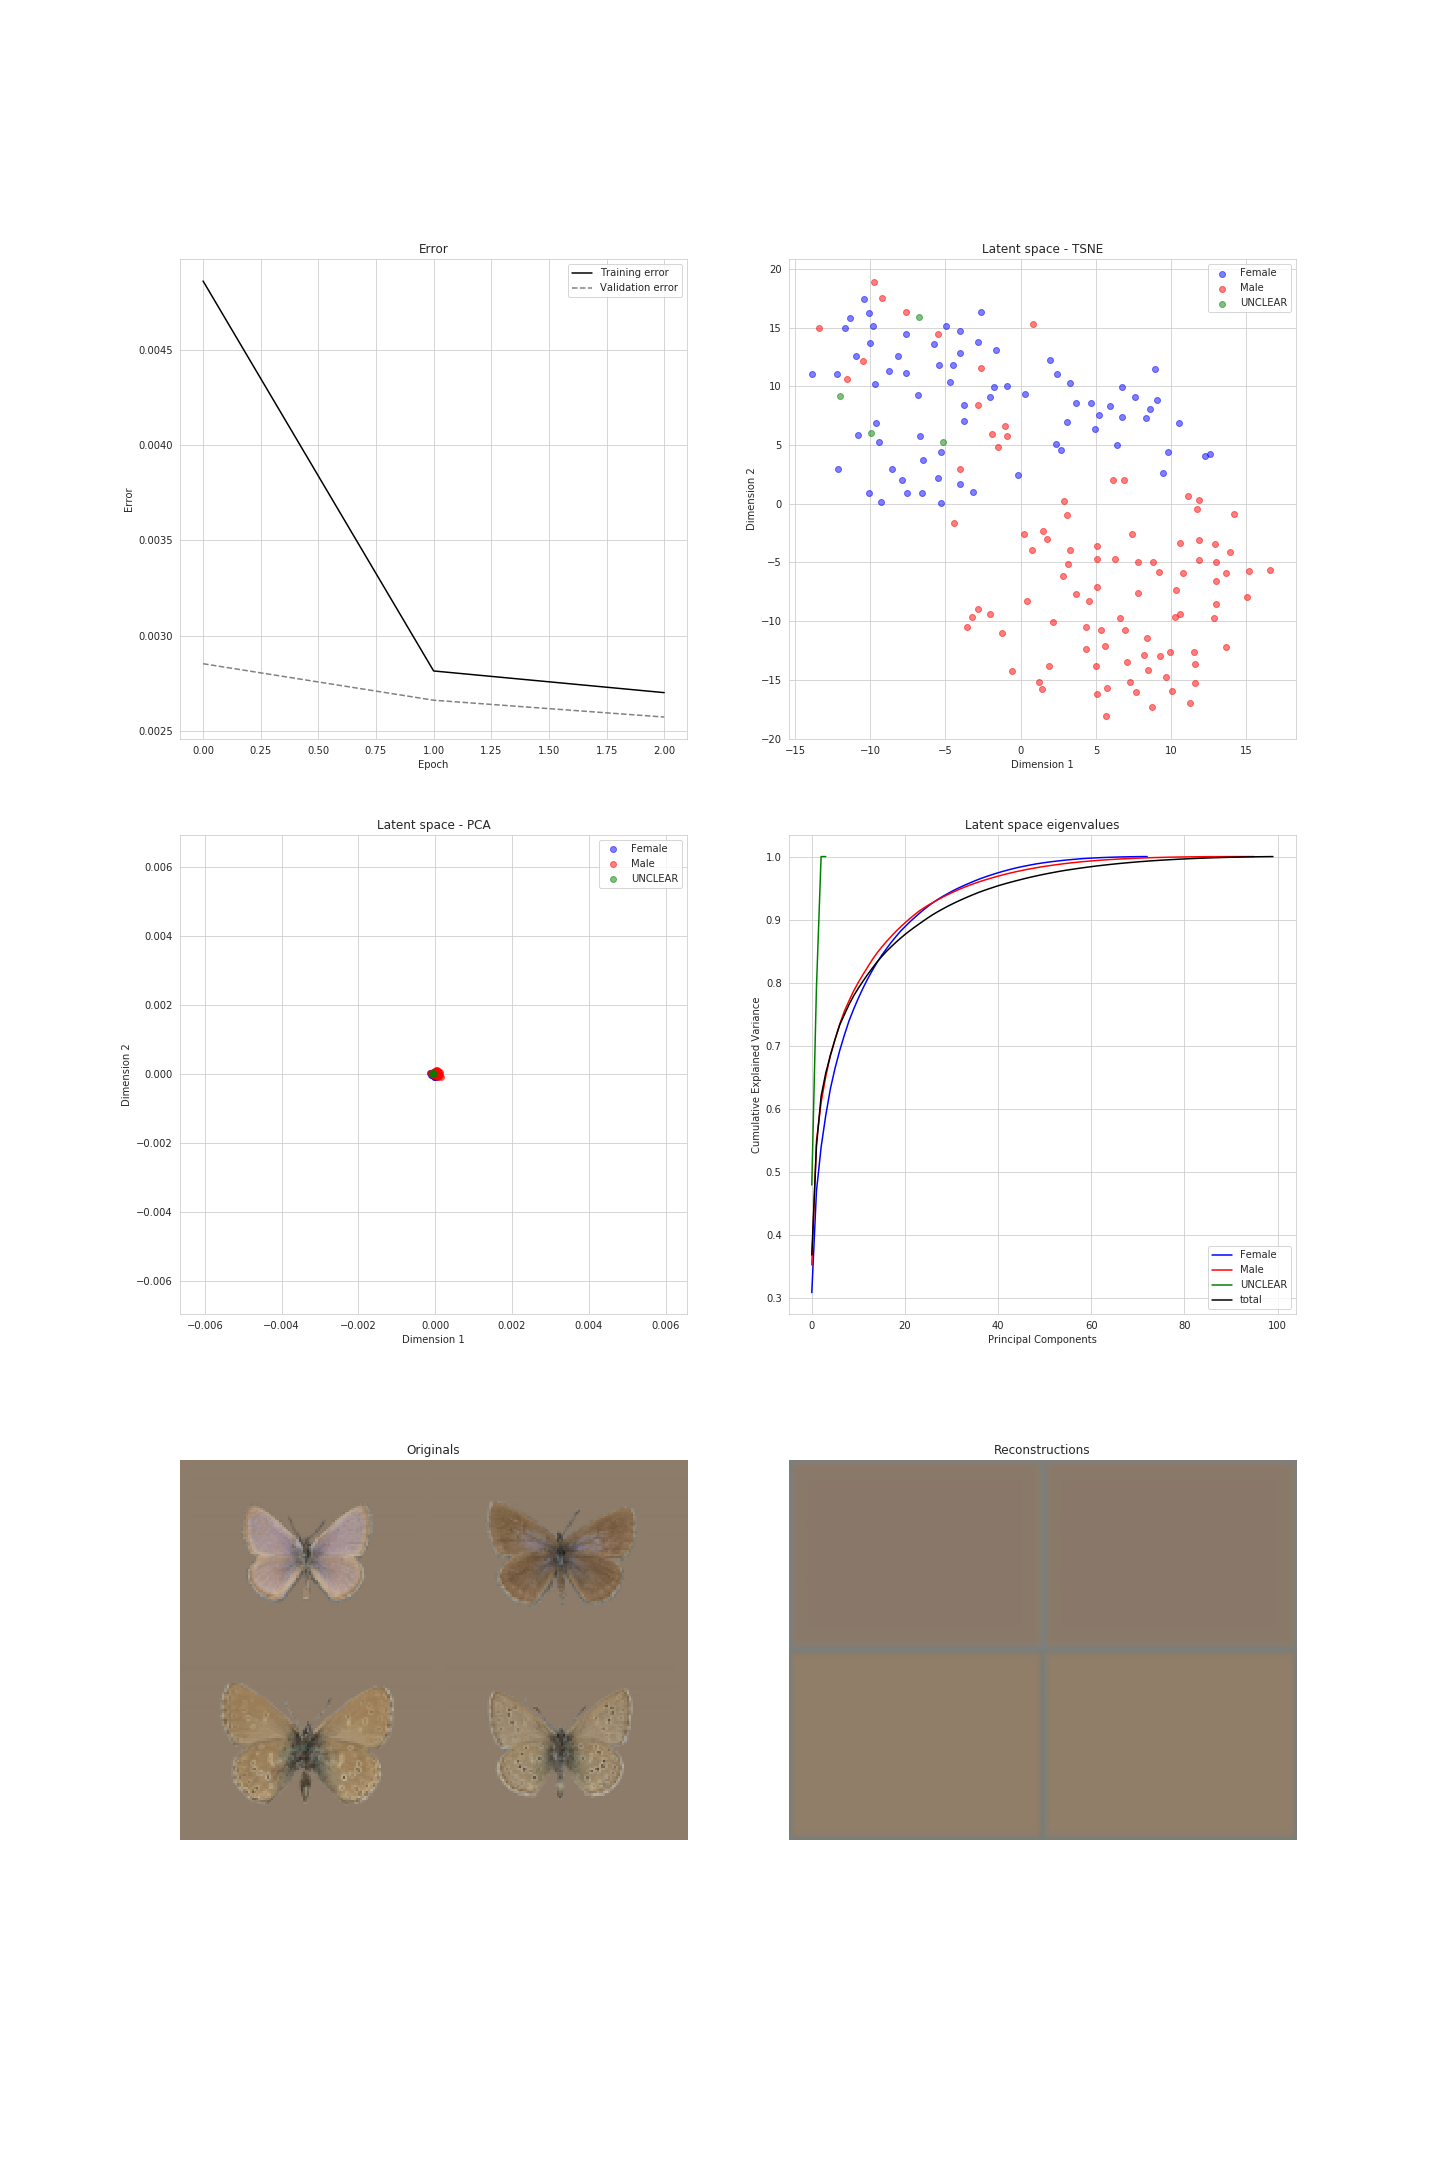

In [3]:
config = dict(modelName='BAELessMPRelu',
              modelParams=dict(imgSize=(160,240),hidden_features=500,latent_features=100, in_channels=6),
              max_num_epochs = 3,
              suffix='_delete',
              opt='adam',
              optParams = {'lr': 0.0003},
              loss='mse',
              batchSize=35,
              earlyStopping=20,
              save_me=False,
               cuda=True,
               #denoise = ('masking_noise',{'p':0.2}),
              datagetter_name = 'butterfly',
                 datagetterParams = dict(
                     background = 'neutral', 
                     dataFilePath = '/home/rob/Dropbox/thesis/2. code/src/data/data.xlsx',
                     root = '/home/rob/Dropbox/thesis/2. code/datasets',
                     classifier_column = 'Sex',
                     transforms = [('resize',dict(size=(160,240))),
                                   ('hflip'),
                                   ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                                   ('totensor')],
                     sides = 'both_in_one',
                 ),
               )

ex = experiment(**config)
#ex.prep_experiment()
ex.test_experiment()
ex.run_experiment()

=> loading checkpoint 'experiments/VAEMnistGMM.pth.tar'
{'batchSize': 10,
 'cuda': True,
 'datagetterParams': {'background': 'black',
                      'dataFilePath': '/home/rob/Dropbox/thesis/2. '
                                      'code/src/data/mnist.xlsx',
                      'root': '/home/rob/Dropbox/thesis/2. code/datasets/mnist',
                      'test_subset': 200,
                      'train_subset': 2000,
                      'transforms': [('rotateandscale',
                                      {'background': 'black',
                                       'rotation': 1,
                                       'scaling': 0.1}),
                                     'totensor']},
 'datagetter_name': 'mnist',
 'denoise': False,
 'earlyStopping': 15,
 'imgSize': (28, 28),
 'loss': 'melo',
 'max_num_epochs': 100,
 'modelName': 'VAEMnistGMM',
 'modelParams': {'cuda': True,
                 'hidden_features': 500,
                 'imgSize': (28, 28),
            


No classifier improvement, stopping after 246 epochs
tensor(1.6254, grad_fn=<NllLossBackward>)


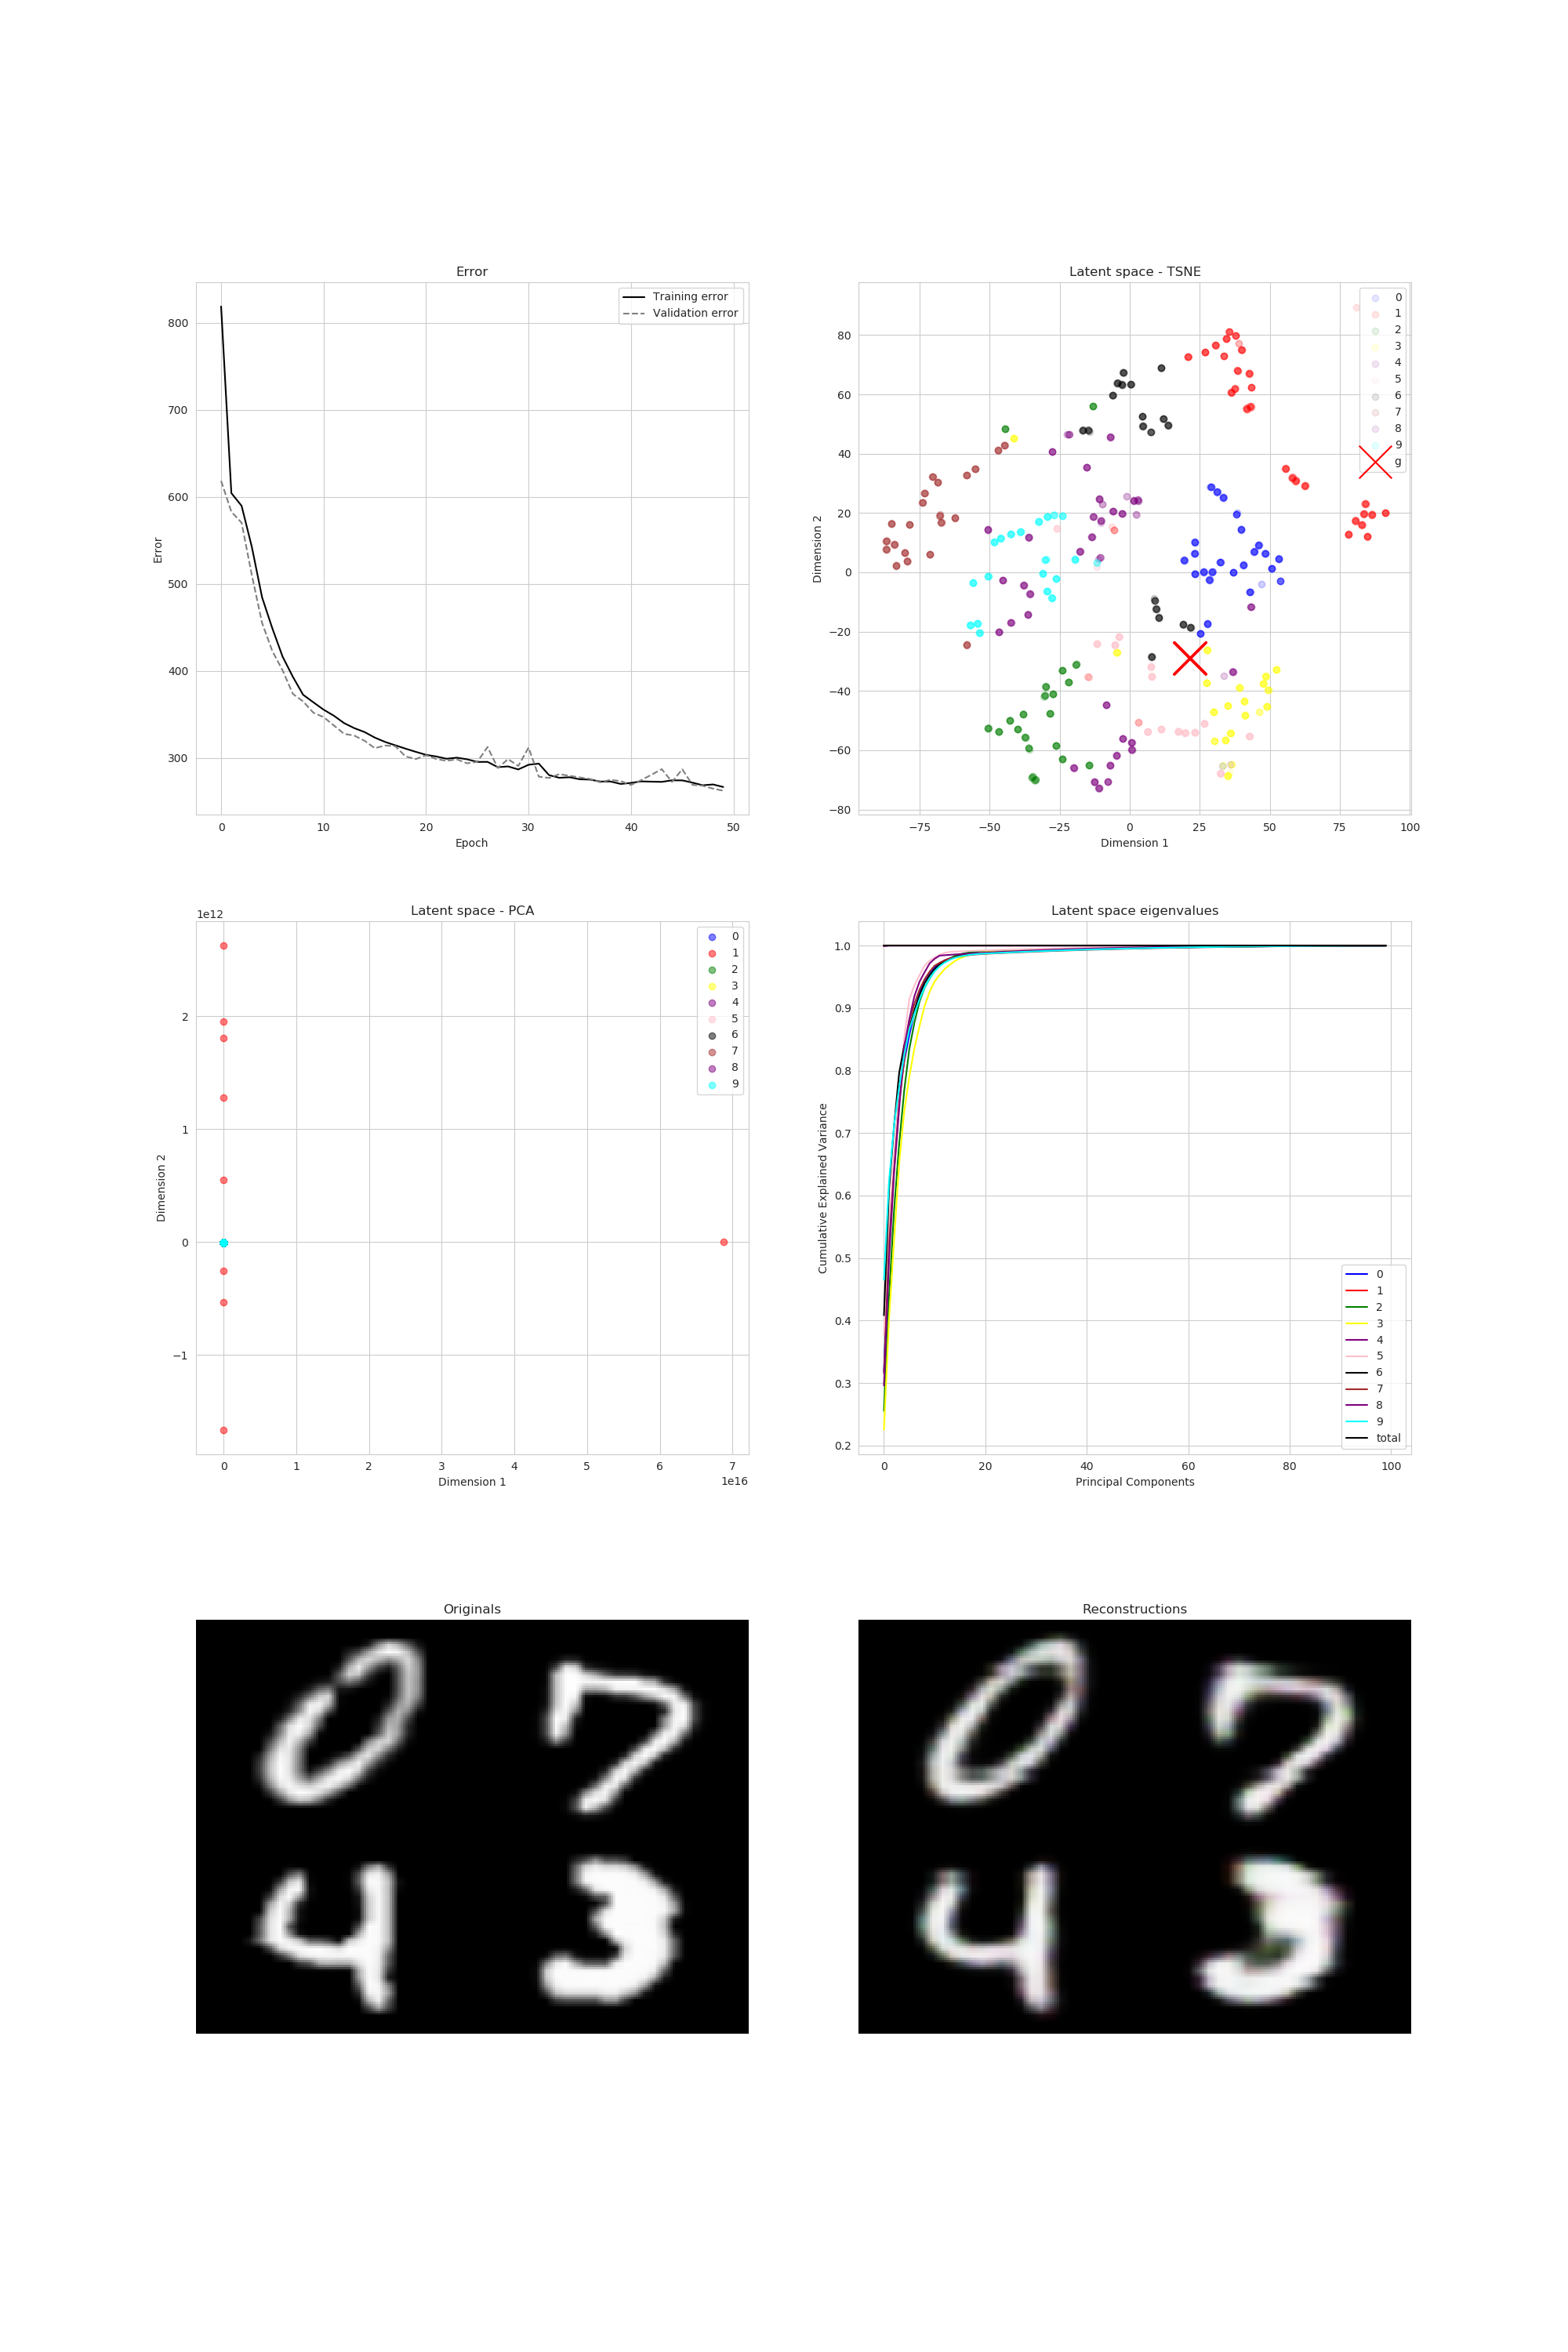

In [1]:
from imports import *
ex = load_experiment('experiments/VAEMnistGMM.pth.tar')
ex.run_experiment(run_one_batch=True)

=> loading checkpoint '/home/rob/Dropbox/thesis/2. code/src/experiments/VAEMnistFCN.pth.tar'
Checkpoint results:
=> loaded checkpoint '/home/rob/Dropbox/thesis/2. code/src/experiments/VAEMnistFCN.pth.tar'



No classifier improvement, stopping after 456 epochs
tensor(0.3258, grad_fn=<NllLossBackward>)


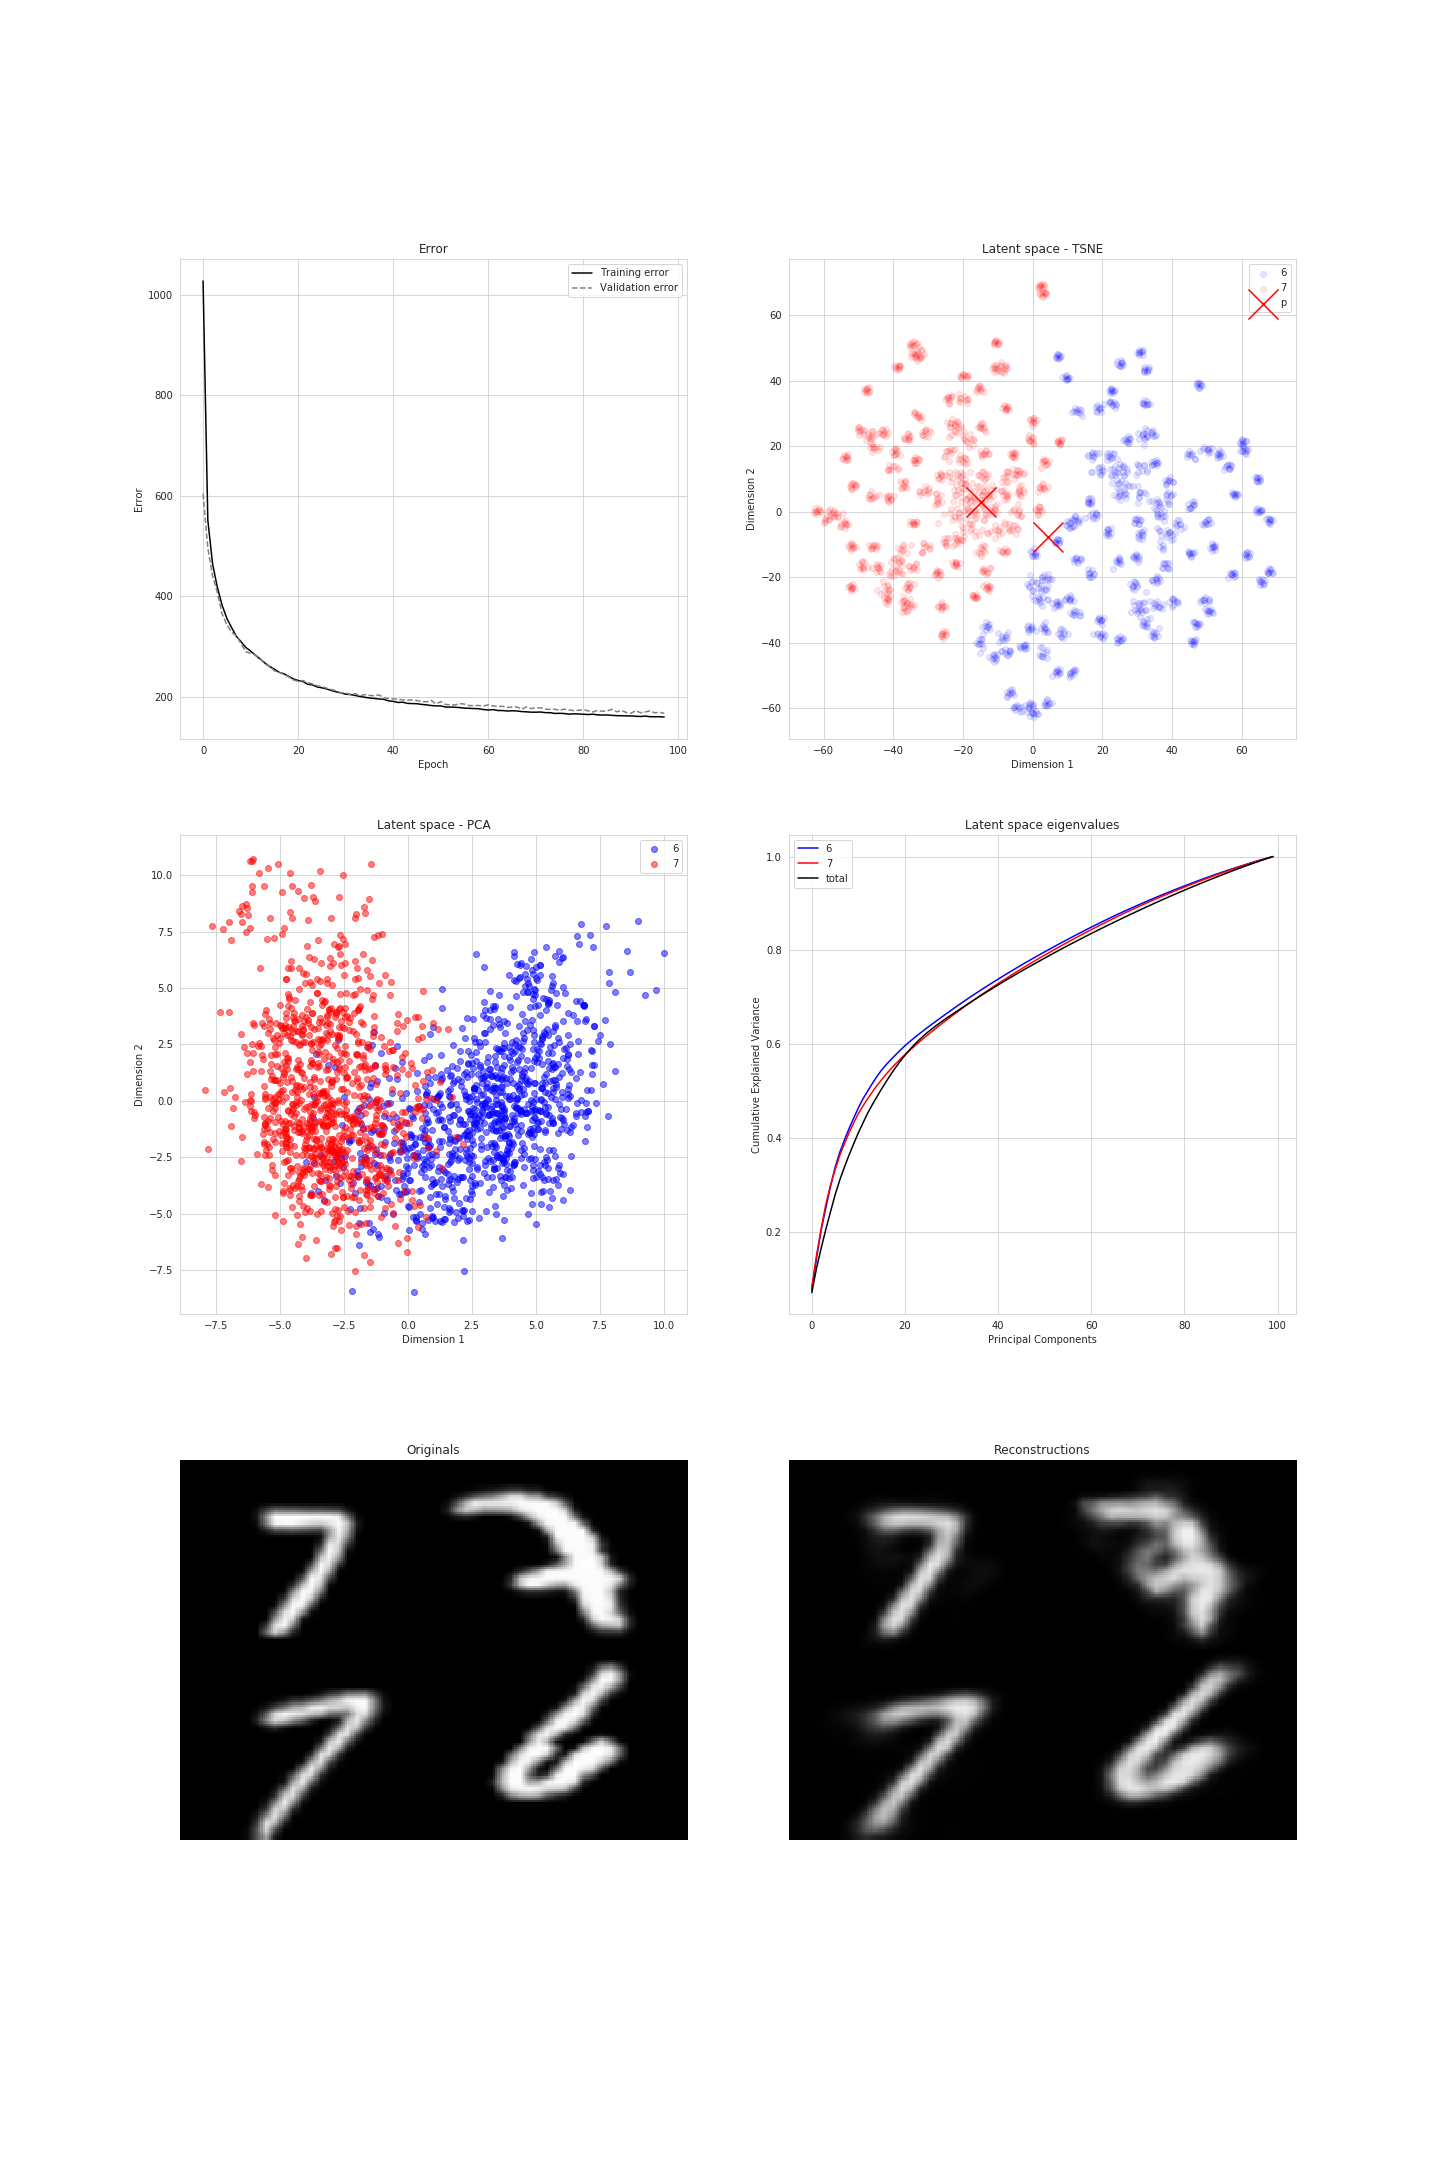

In [3]:

from imports import *
config = dict(modelName='VAEMnistFCN',
              modelParams=dict(imgSize=(28,28),
                               hidden_features=500,
                               latent_features=100, 
                               in_channels=1, 
                               num_samples=10,
                               cuda=True ,
                               mc_points = 1000,
                               n_q_gaussians=1, 
                               prior_initializer_name = 'random',
                               prior_initializer_params = dict(n_gaussians=2, sigma=1, mu_max=3,mu_min=-3)
                               ),
                 max_num_epochs = 100,
                 suffix='_1p_2q_allxhat',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='gimp_pp',
                 batchSize=7,
                 earlyStopping=10,
                 imgSize=(28,28),
                 cuda=True,
                 save_me=True,
                 datagetter_name = 'mnist',
                 datagetterParams = dict(
                     background = 'black', 
                     train_subset=2000,
                     test_subset=200,
                     dataFilePath = '/home/rob/Dropbox/thesis/2. code/src/data/mnist.xlsx',
                     root = '/home/rob/Dropbox/thesis/2. code/datasets/mnist',
                     transforms = [('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'black'}),
                                   ('grayscale'),
                                   ('totensor')],
                     included_classes = [6,7],
                 ),
             )



ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

=> loading checkpoint '/home/rob/Dropbox/thesis/2. code/src/experiments/VAEMnistGMMPP.pth.tar'
Checkpoint results:
=> loaded checkpoint '/home/rob/Dropbox/thesis/2. code/src/experiments/VAEMnistGMMPP.pth.tar'



No classifier improvement, stopping after 307 epochs
tensor(0.3169, grad_fn=<NllLossBackward>)


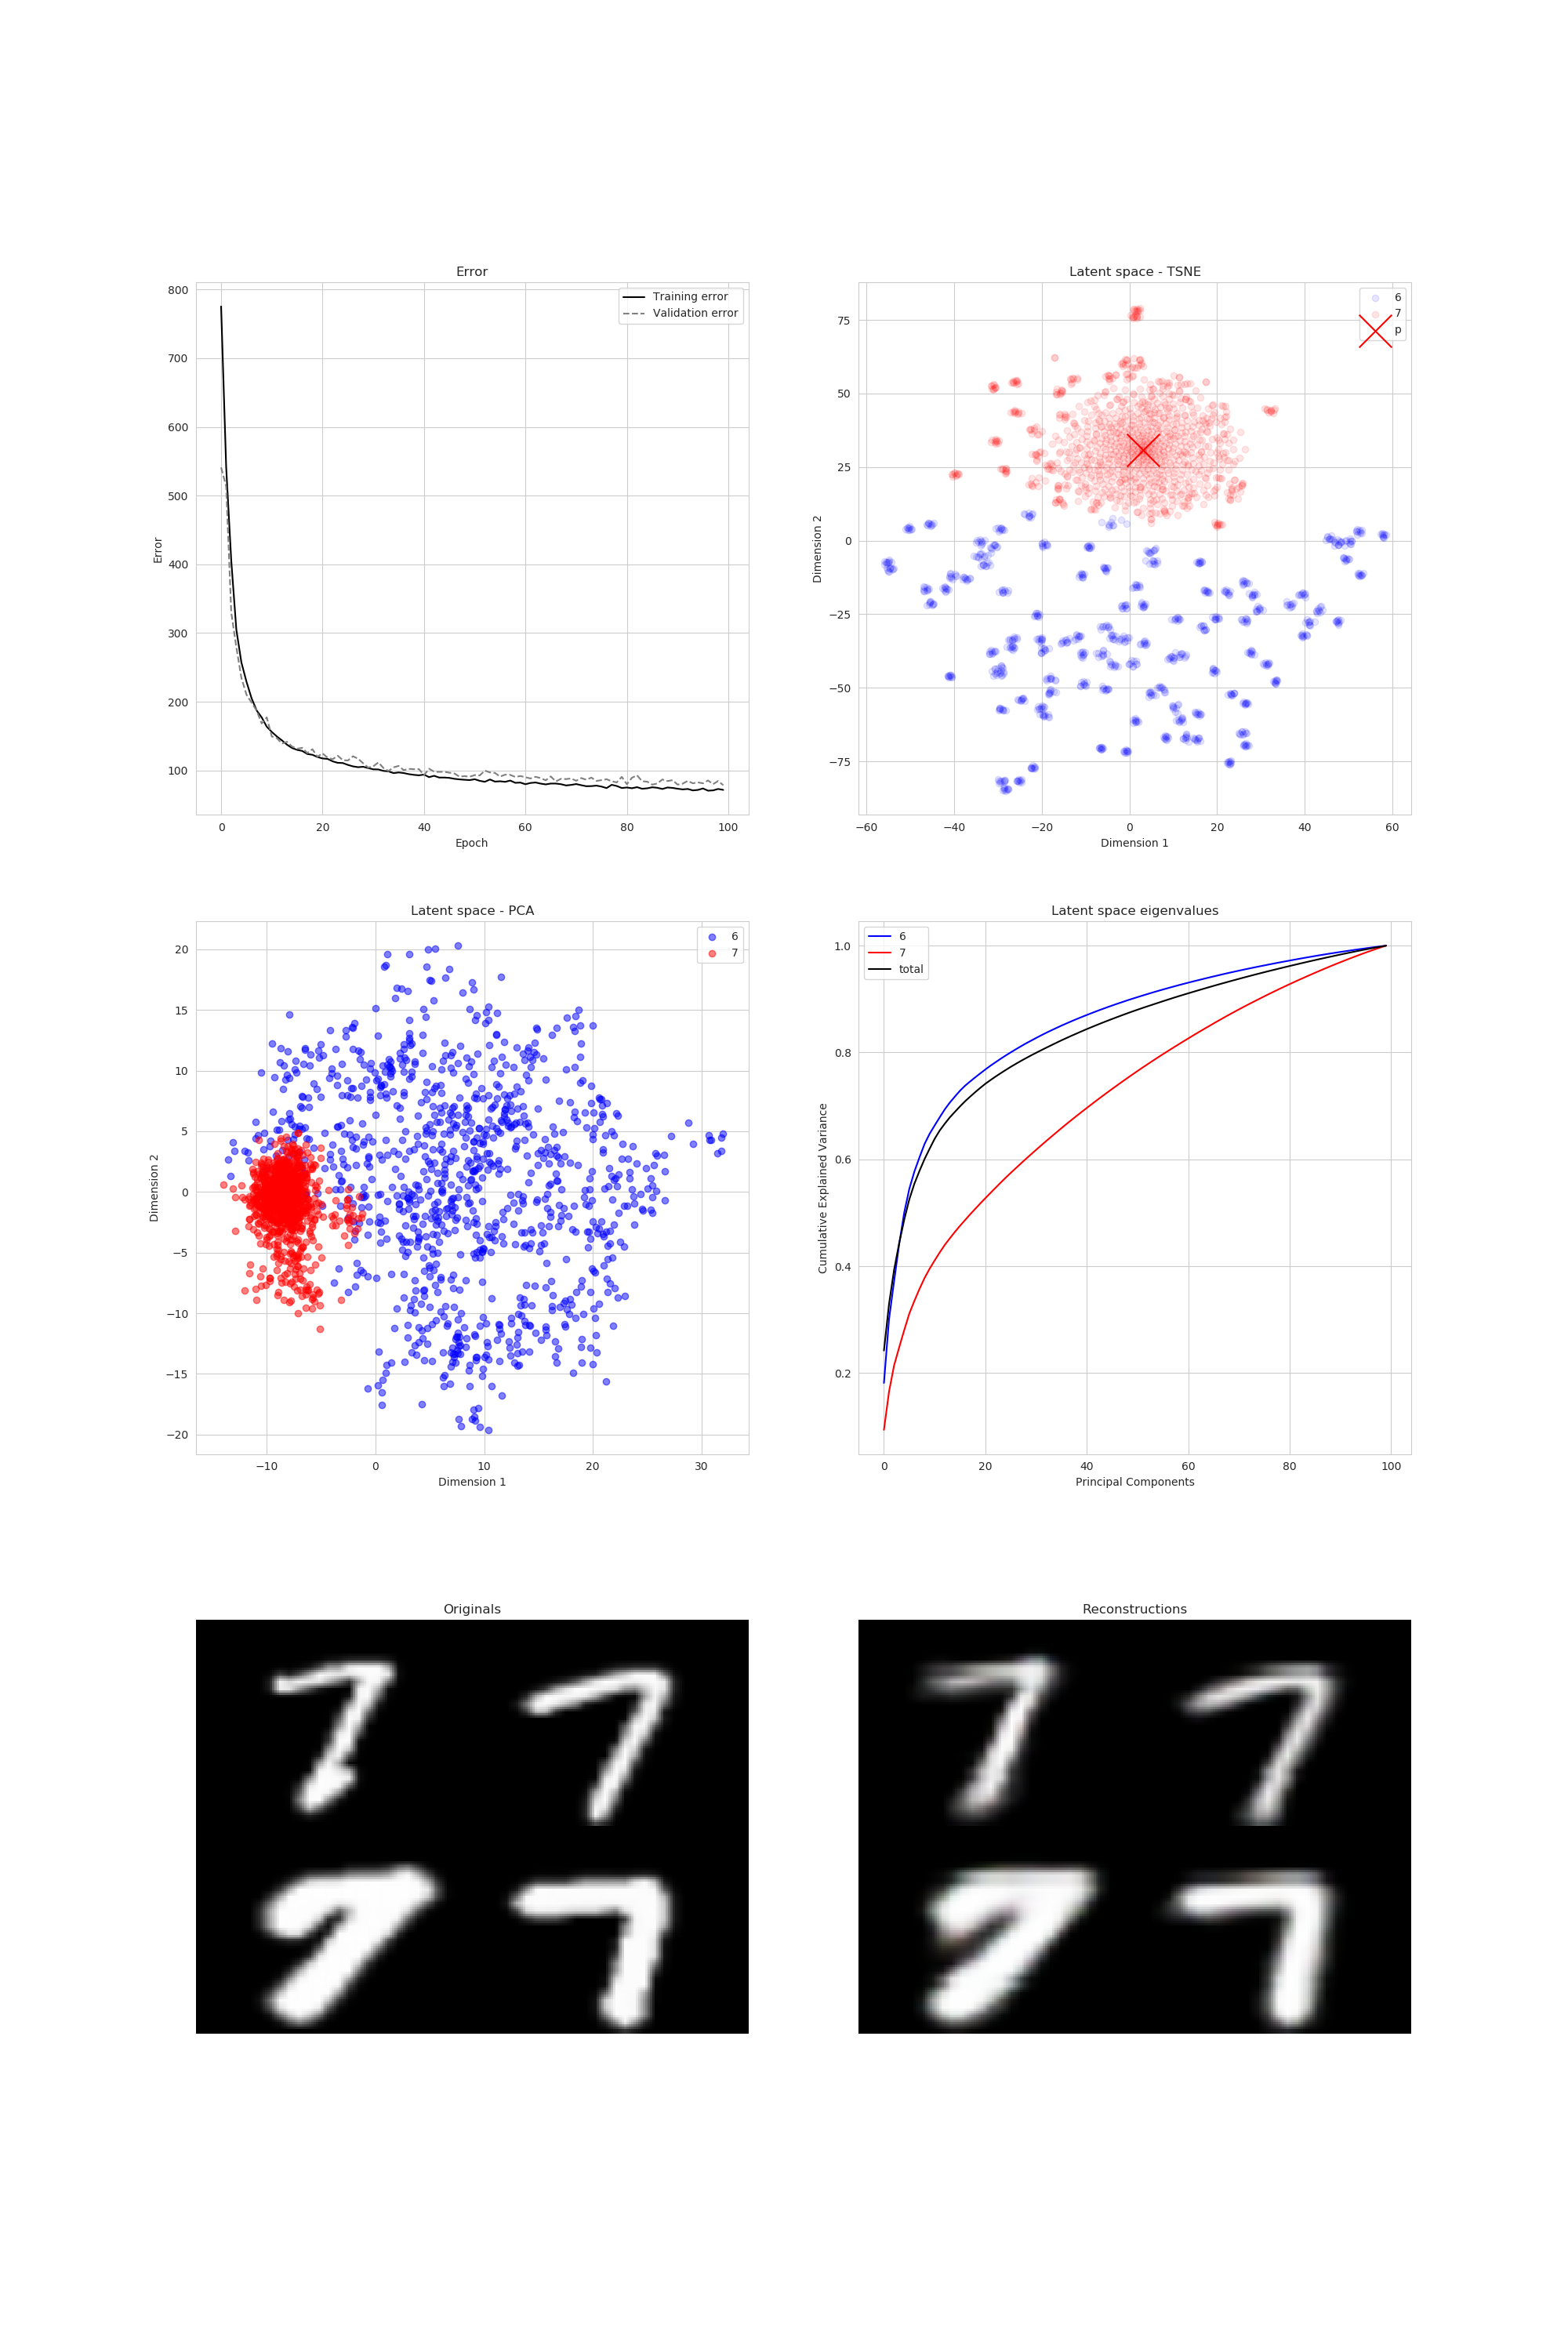

In [1]:
from imports import *
config = dict(modelName='VAEMnistGMMPP',
              modelParams=dict(imgSize=(28,28),
                               hidden_features=500,
                               latent_features=100, 
                               in_channels=3, 
                               num_samples=10,
                               cuda=True ,
                               n_p_gaussians = 1, 
                               n_q_gaussians = 1, 
                               min_mu=-5, 
                               max_mu=5, 
                               sigma=1,
                              mc_points = 1000),
                 max_num_epochs = 100,
                 suffix='_1p_1q',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='gimp_pp',
                 batchSize=7,
                 earlyStopping=15,
                 imgSize=(28,28),
                 cuda=True,
                 save_me=True,
                 datagetter_name = 'mnist',
                 datagetterParams = dict(
                     background = 'black', 
                     train_subset=2000,
                     test_subset=200,
                     dataFilePath = '/home/rob/Dropbox/thesis/2. code/src/data/mnist.xlsx',
                     root = '/home/rob/Dropbox/thesis/2. code/datasets/mnist',
                     transforms = [('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'black'}),
                                   ('totensor')],
                     included_classes = [6,7],
                 ),
             )



ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [2]:
ex.results['classifier_v_accuracy']

0.9775

In [1]:
from imports import *
ex=load_experiment('experiments/0.99_1.00_gimp_mse_10326671_2019-07-07_VAEMnistGMM_2g_67_mse_real_kl_beta.pth.tar')

=> loading checkpoint 'experiments/0.99_1.00_gimp_mse_10326671_2019-07-07_VAEMnistGMM_2g_67_mse_real_kl_beta.pth.tar'
{'batchSize': 7,
 'cuda': True,
 'datagetterParams': {'background': 'black',
                      'dataFilePath': '/home/rob/Dropbox/thesis/2. '
                                      'code/src/data/mnist.xlsx',
                      'included_classes': [6, 7],
                      'root': '/home/rob/Dropbox/thesis/2. code/datasets/mnist',
                      'test_subset': 200,
                      'train_subset': 2000,
                      'transforms': [('rotateandscale',
                                      {'background': 'black',
                                       'rotation': 1,
                                       'scaling': 0.1}),
                                     'totensor']},
 'datagetter_name': 'mnist',
 'denoise': False,
 'earlyStopping': 15,
 'imgSize': (28, 28),
 'loss': 'gimp_mse',
 'max_num_epochs': 100,
 'modelName': 'VAEMnistGMM',
 'model

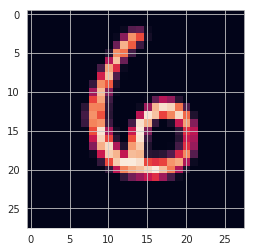

In [9]:
plt.imshow(ex.results['outputs_example']['x'][0][0].cpu().numpy())

In [1]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True) 

{'status': 'ok', 'restart': True}

No improvement on validation set for 5 epochs. Quiting.



No classifier improvement, stopping after 257 epochs
tensor(0.6974, grad_fn=<NllLossBackward>)


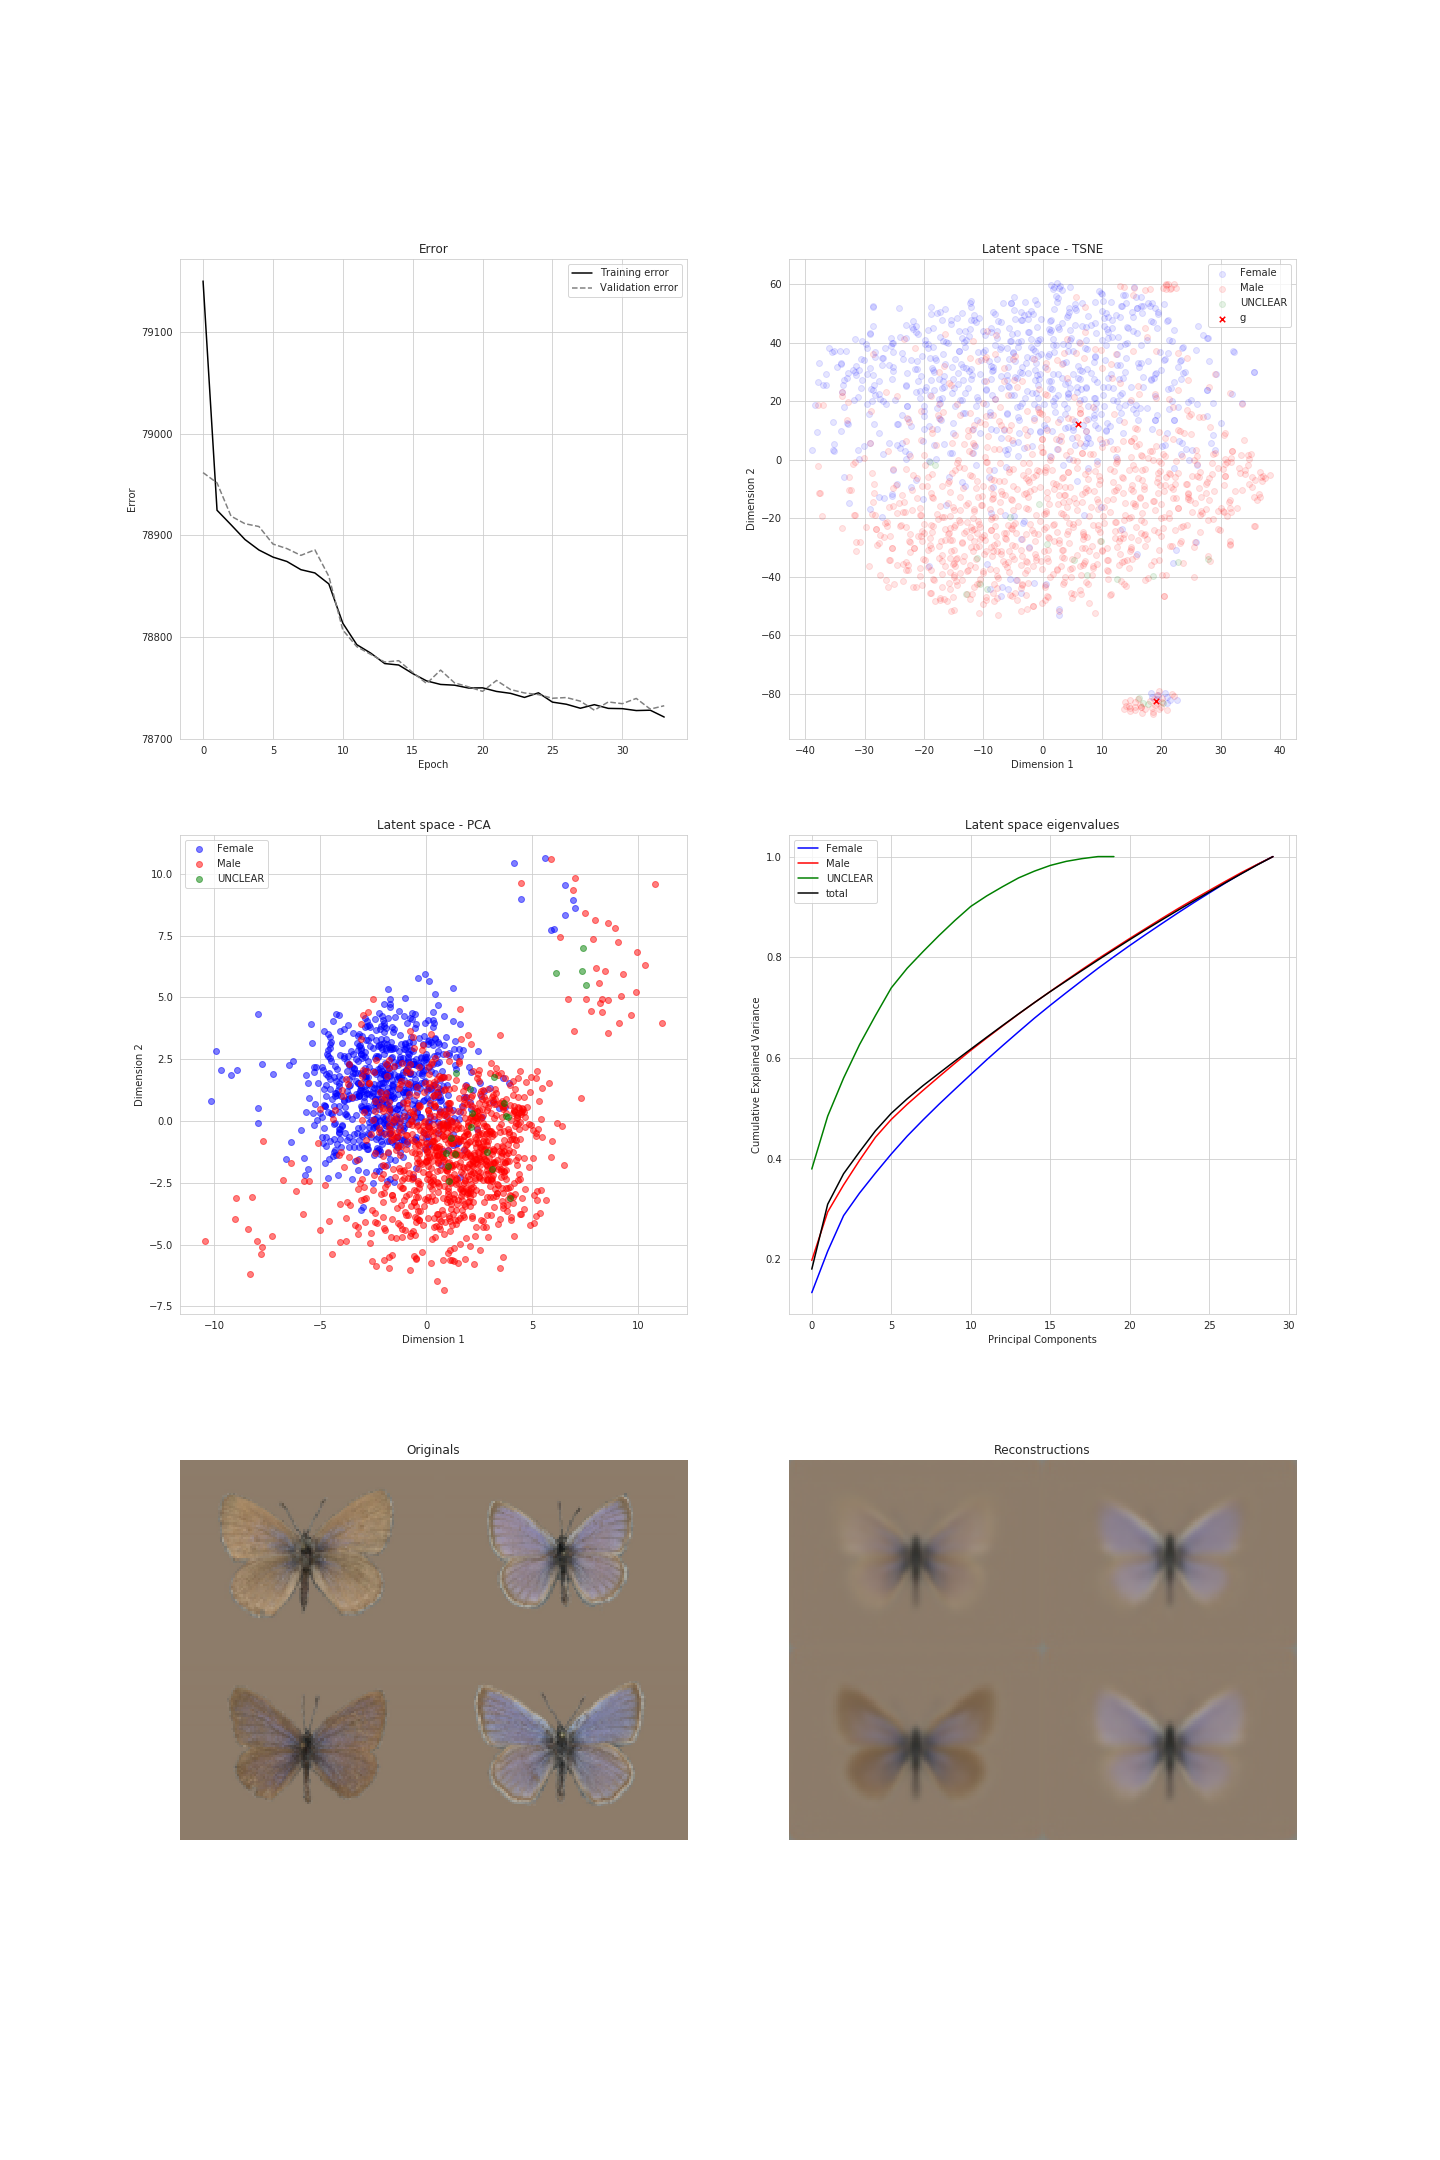

In [2]:

config = dict(modelName='VariationalAutoEncoderGMM',
              modelParams=dict(imgSize=(160,240),
                               hidden_features=500,
                               latent_features=30, 
                               in_channels=3, 
                               num_samples=10,
                               cuda=True, 
                               n_gaussians = 2, 
                               min_mu=-3, 
                               max_mu=3, 
                               sigma=1),
                 max_num_epochs = 300,
                 suffix='_V_2g',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='melo',
                 batchSize=7,
                 earlyStopping=5,
                 cuda=True,
                 datagetter_name = 'butterfly',
                 datagetterParams = dict(
                     background = 'neutral', 
                     dataFilePath = '/home/rob/Dropbox/thesis/2. code/src/data/data.xlsx',
                     root = '/home/rob/Dropbox/thesis/2. code/datasets',
                     classifier_column = 'Sex',
                     transforms = [('resize',dict(size=(160,240))),
                                   ('hflip'),
                                   ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                                   ('totensor')],
                     sides = 'D',
                 ),
             )



ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [3]:
ex.classifier_v_accuracy

0.8488505747126437

In [2]:
ex = load_experiment('experiments/0.91_0.98_melo_29249741_2019-06-24_VAEMnistGMM_10g_subset.pth.tar')

=> loading checkpoint 'experiments/0.91_0.98_melo_29249741_2019-06-24_VAEMnistGMM_10g_subset.pth.tar'
{'modelName': 'VAEMnistGMM', 'modelParams': {'imgSize': (28, 28), 'hidden_features': 500, 'latent_features': 100, 'in_channels': 3, 'num_samples': 10, 'cuda': True, 'n_gaussians': 10, 'min_mu': -3, 'max_mu': 3, 'sigma': 1}, 'loss': 'melo', 'opt': 'adam', 'optParams': {'lr': 5e-05}, 'imgSize': (28, 28), 'batchSize': 10, 'earlyStopping': 3, 'max_num_epochs': 100, 'cuda': True, 'denoise': False, 'datagetter_name': 'mnist', 'datagetterParams': {'background': 'black', 'train_subset': 2000, 'test_subset': 500, 'dataFilePath': '/home/rob/Dropbox/thesis/2. code/src/data/mnist.xlsx', 'root': '/home/rob/Dropbox/thesis/2. code/datasets/mnist', 'transforms': [('resize', {'size': (28, 28)}), ('rotateandscale', {'rotation': 1, 'scaling': 0.1, 'background': 'black'}), 'totensor']}}
Prepping Experiment..
Prepping Experiment..
=> loaded checkpoint 'experiments/0.91_0.98_melo_29249741_2019-06-24_VAEMnis


No classifier improvement, stopping after 278 epochs
tensor(1.6214, grad_fn=<NllLossBackward>)


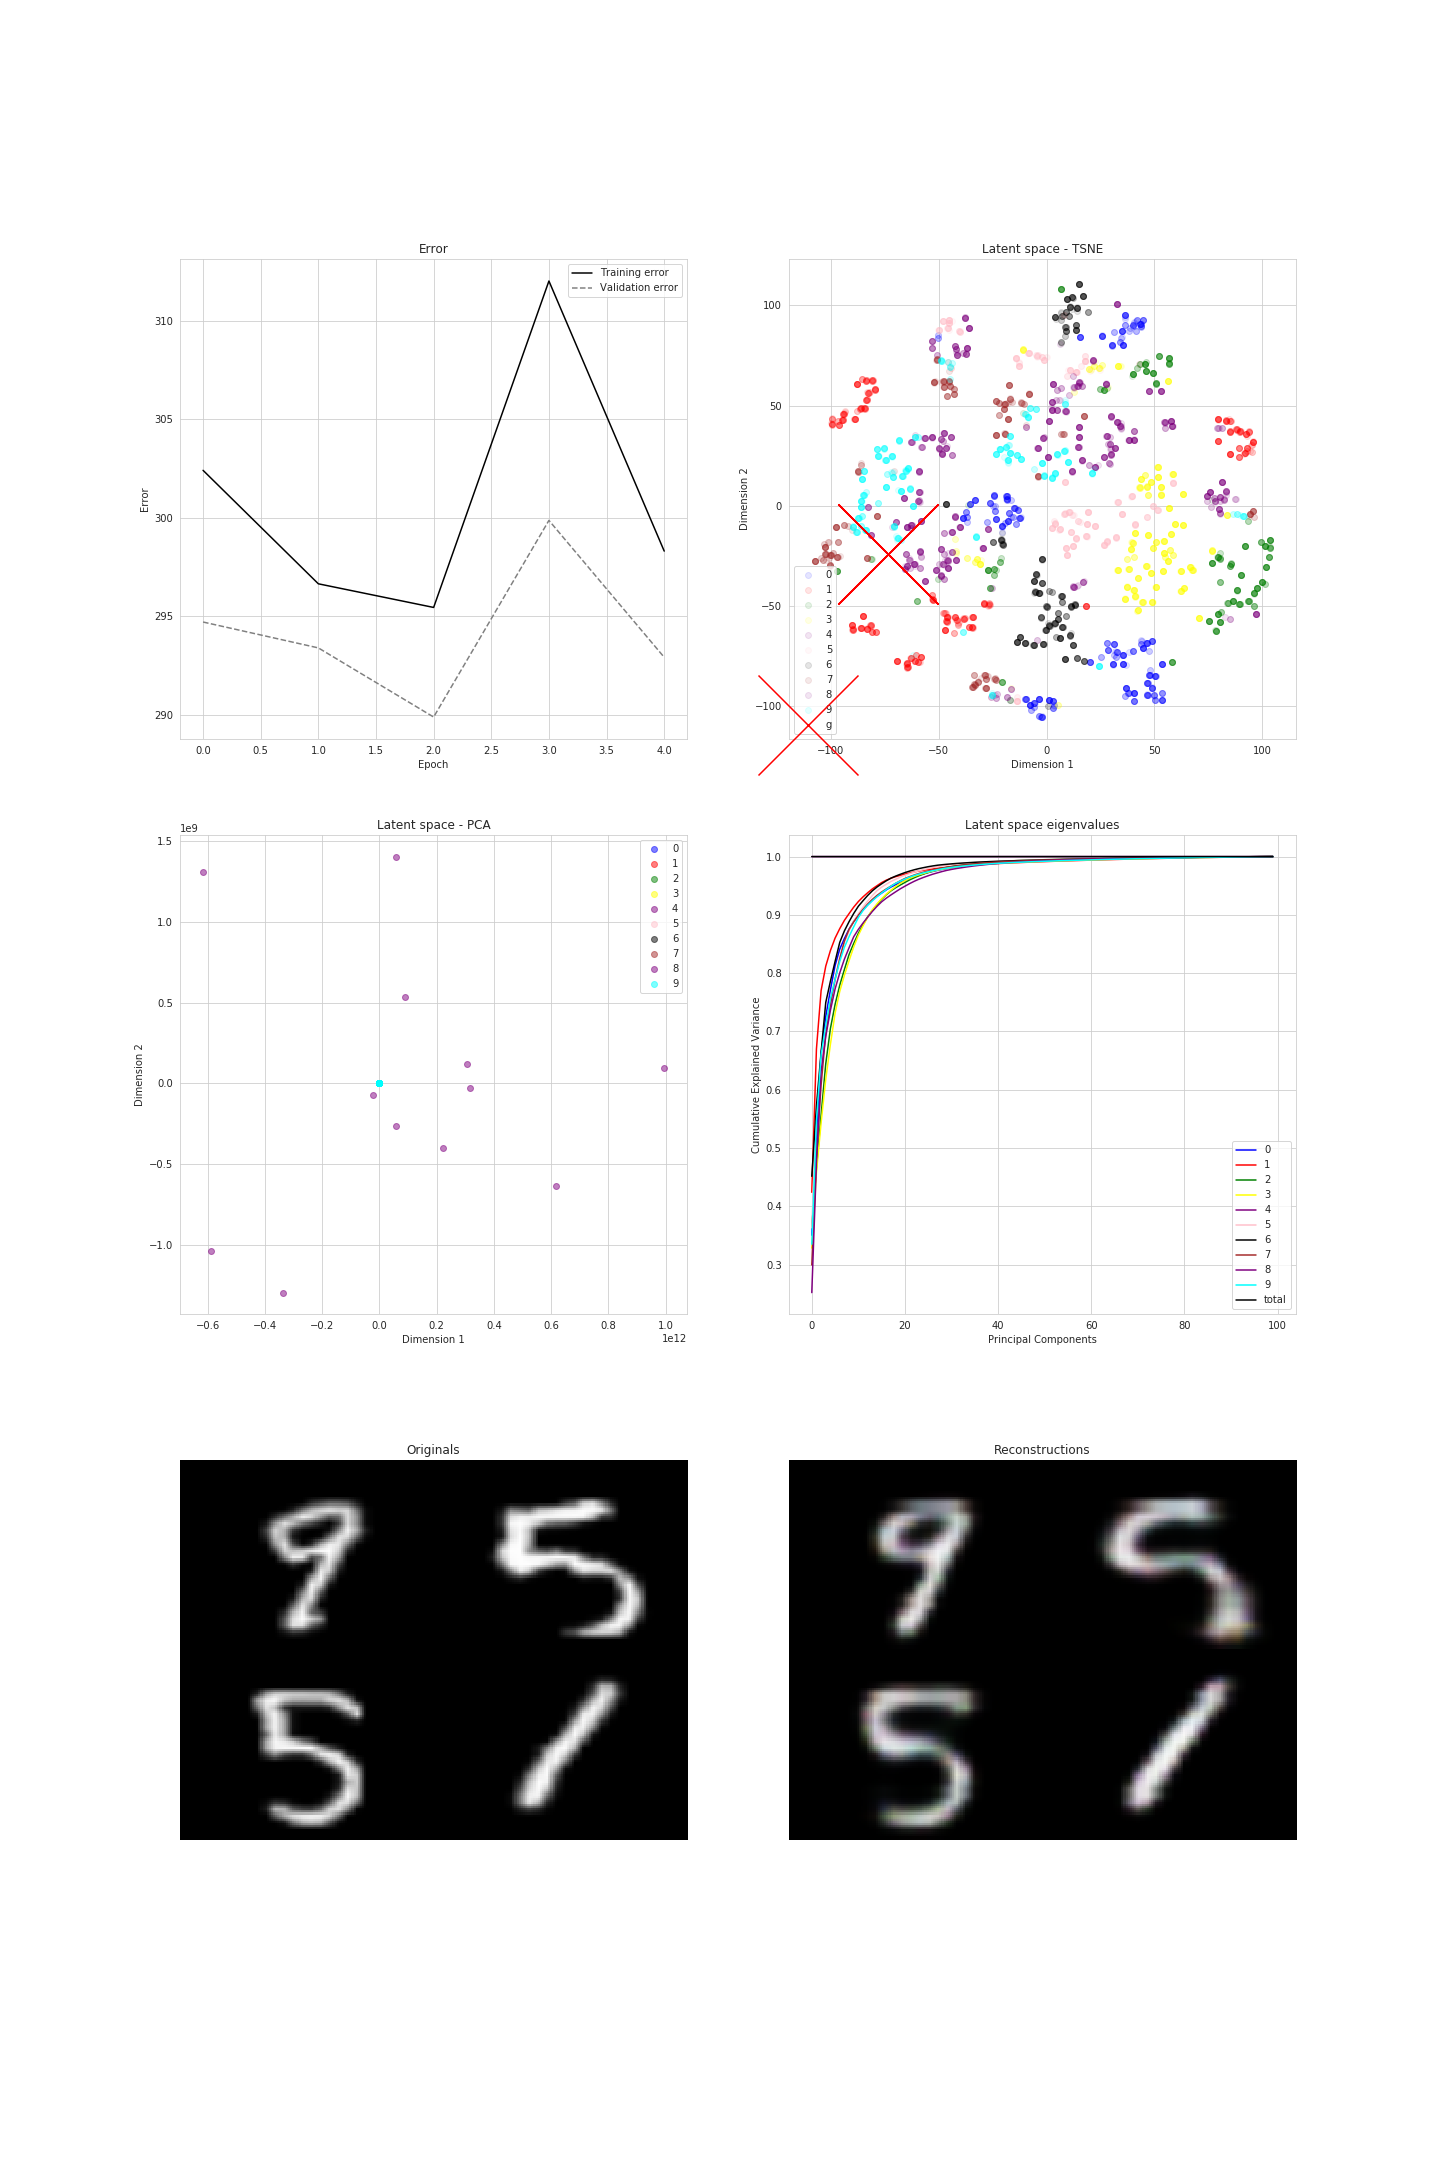

In [3]:
#ex.datagetterParams['train_subset'] = 3000
#ex.datagetterParams['test_subset'] = 600
ex.save = True
ex.max_num_epochs = 5
ex.run_experiment()

In [2]:
ex = load_experiment('experiments/0.98_0.99_melo_25283241_2019-06-21_VAEMnistGMM.pth.tar')

=> loading checkpoint 'experiments/0.98_0.99_melo_25283241_2019-06-21_VAEMnistGMM.pth.tar'
{'modelName': 'VAEMnistGMM', 'modelParams': {'imgSize': (28, 28), 'hidden_features': 500, 'latent_features': 100, 'in_channels': 3, 'num_samples': 10, 'cuda': True, 'n_gaussians': 10, 'min_mu': -3, 'max_mu': 3, 'sigma': 1}, 'loss': 'melo', 'opt': 'adam', 'optParams': {'lr': 5e-05}, 'imgSize': (28, 28), 'batchSize': 3, 'earlyStopping': 5, 'max_num_epochs': 1, 'cuda': True, 'denoise': False, 'datagetter_name': 'mnist', 'datagetterParams': {'background': 'black', 'dataFilePath': '/home/rob/Dropbox/thesis/2. code/src/data/mnist.xlsx', 'root': '/home/rob/Dropbox/thesis/2. code/datasets/mnist', 'transforms': [('resize', {'size': (28, 28)}), ('rotateandscale', {'rotation': 1, 'scaling': 0.1, 'background': 'black'}), 'totensor']}}
Prepping Experiment..
Prepping Experiment..
=> loaded checkpoint 'experiments/0.98_0.99_melo_25283241_2019-06-21_VAEMnistGMM.pth.tar'


Running Experiment with Configuration: 
{'batchSize': 10,
 'cuda': True,
 'datagetterParams': {'background': 'black',
                      'dataFilePath': '/home/rob/Dropbox/thesis/2. '
                                      'code/src/data/mnist.xlsx',
                      'root': '/home/rob/Dropbox/thesis/2. code/datasets/mnist',
                      'transforms': [('resize', {'size': (28, 28)}),
                                     ('rotateandscale',
                                      {'background': 'black',
                                       'rotation': 1,
                                       'scaling': 0.1}),
                                     'totensor']},
 'datagetter_name': 'mnist',
 'denoise': False,
 'earlyStopping': 5,
 'imgSize': (28, 28),
 'loss': 'melo',
 'max_num_epochs': 1,
 'modelName': 'VAEMnistGMM',
 'modelParams': {'cuda': True,
                 'hidden_features': 500,
                 'imgSize': (28, 28),
                 'in_channels': 3,
             


No classifier improvement, stopping after 3109 epochs
tensor(1.4776, grad_fn=<NllLossBackward>)


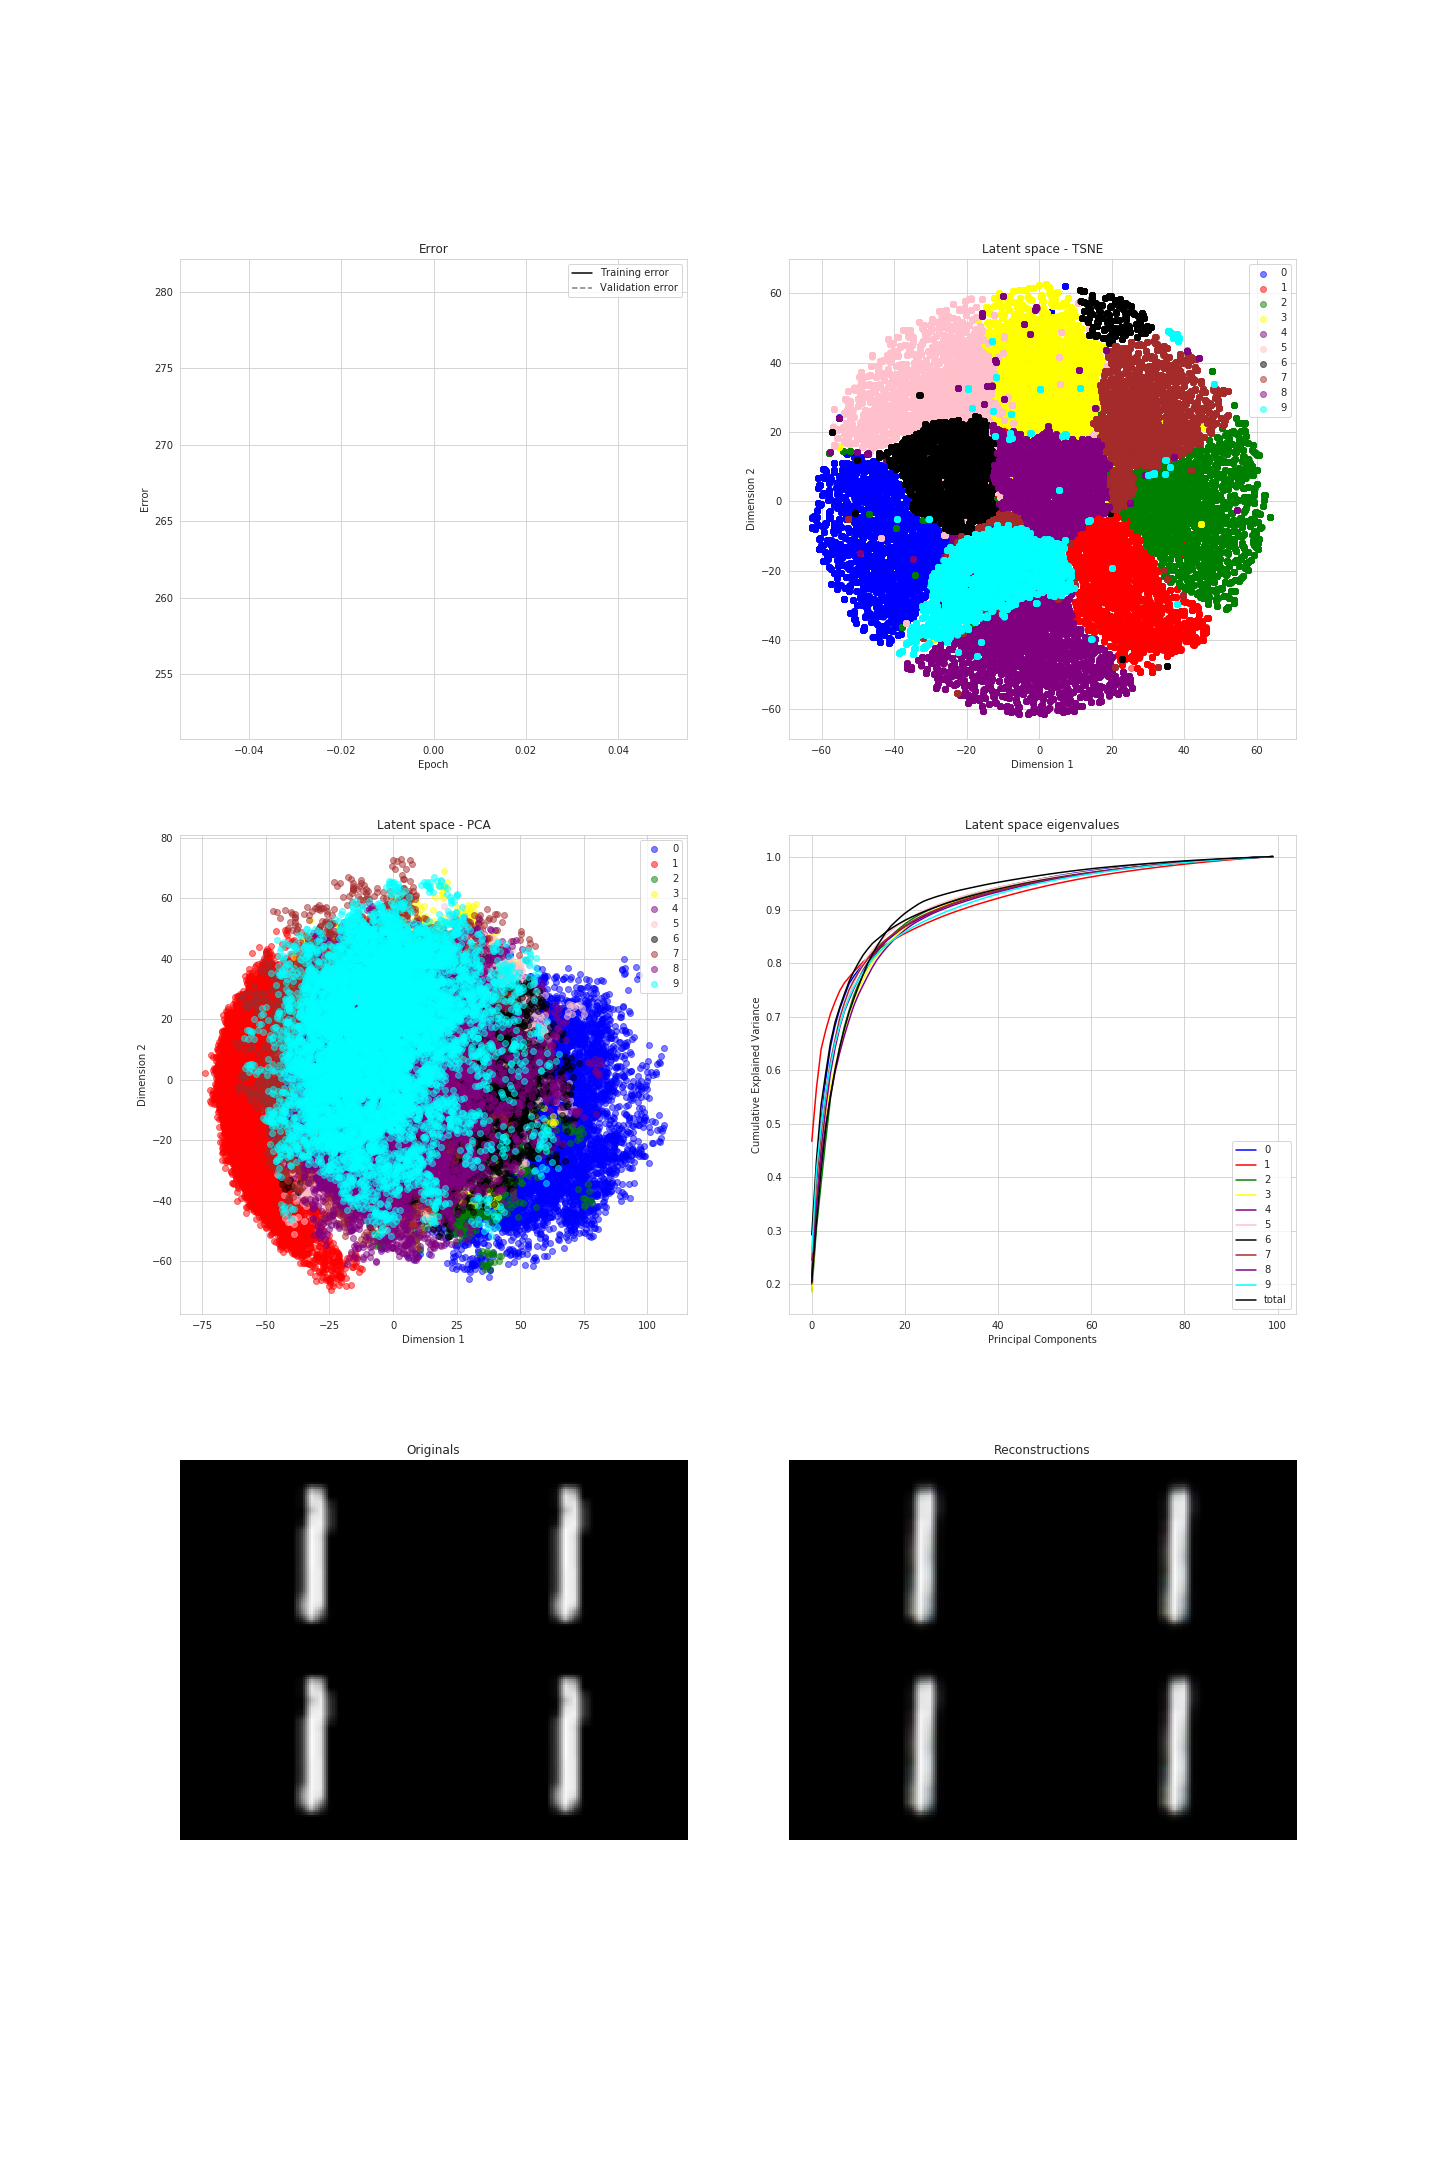

In [3]:
ex.imgSize = (28,28)
ex.max_num_epochs=1
ex.batchSize = 10
ex.run_experiment()

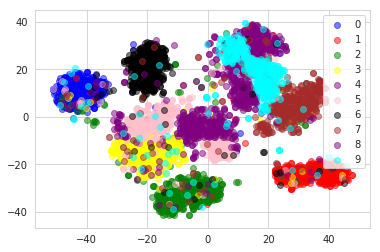

In [78]:
import matplotlib
matplotlib.use('Agg')

for i in range(len(classes)):
    plt.scatter(*z_tsne[y_plot == classes[i]].T, c=colors[i], marker='o', label=classes[i], alpha=0.5)

plt.legend(classes)

In [139]:
from scipy.spatial.distance import cdist

np.array(ex.y_valid).reshape(10000,10)[:,0]
for i in range(20):
    a = ex.z_valid[i*10:(i+1)*10]
    b = ex.z_valid[(i+1)*10:(i+2)*10]
    print('self dist',cdist(a,a).mean())
    print('next dist',cdist(a,b).mean())

self dist 41.27333586155379
next dist 99.62679659929034
self dist 48.65509578046258
next dist 106.25680341043406
self dist 41.562359381877215
next dist 80.80363333096459
self dist 39.10068423536727
next dist 104.50938433550938
self dist 36.943593672202795
next dist 87.61717376666915
self dist 34.63004390782738
next dist 96.30576275279249
self dist 35.47722924164854
next dist 95.13268884028287
self dist 44.2760408717679
next dist 111.6303360414014
self dist 40.60853621693579
next dist 113.0841554042552
self dist 36.702818583750215
next dist 87.49272361757144
self dist 40.41556025229311
next dist 113.7767590683754
self dist 49.785975458238916
next dist 141.6855371940234
self dist 42.20518426583698
next dist 110.36483183841074
self dist 42.67384038485989
next dist 68.72915773139614
self dist 38.639297456808805
next dist 84.4894484637663
self dist 40.010083626972495
next dist 110.53405813978561
self dist 36.675483374833014
next dist 99.83620468040085
self dist 43.28508232424226
next dist 8

In [190]:
ex.outputs_example['mu'].shape

torch.Size([1, 10, 1, 100])

In [87]:
p

Figure(id='1718', ...)

In [ ]:
ex.imgSize = (28,28)
ex.max_num_epochs=1
ex.batchSize = 10
ex.run_classifier()

In [1]:
ex

NameError: name 'ex' is not defined

In [4]:
ex.classifier_v_accuracy

0.766

In [4]:
ex.run_classifier()

RuntimeError: size mismatch, m1: [10 x 307200], m2: [6272 x 500] at /opt/conda/conda-bld/pytorch_1549636813070/work/aten/src/TH/generic/THTensorMath.cpp:940

In [4]:
ex.net.encoder.sizes

[torch.Size([10, 64, 28, 28]), torch.Size([10, 128, 14, 14])]

In [ ]:
config = dict(modelName='VariationalAutoEncoderNoUnpool',
              modelParams=dict(imgSize=(160,240),
                               hidden_features=500,
                               latent_features=30, 
                               in_channels=3, 
                               num_samples=13,
                               cuda=True),
                 max_num_epochs = 300,
                 suffix='',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='elbo',
                 batchSize=10,
                 earlyStopping=30,
                 cuda=True,
                 datagetter_name = 'mnist',
                 datagetterParams = dict(
                     background = 'black', 
                     dataFilePath = '/home/rob/Dropbox/thesis/2. code/src/data/mnist.xlsx',
                     root = '/home/rob/Dropbox/thesis/2. code/datasets/mnist',
                     transforms = [('resize',dict(size=(160,240))),
                                   ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'black'}),
                                   ('totensor')],
                     train_subset = 2008,
                     test_subset = 500,
                 ),
             )



ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [ ]:
ex.classifier_t_accuracy

No improvement on validation set for 30 epochs. Quiting.
No classifier improvement, stopping after 230 epochs
tensor(0.6496, grad_fn=<NllLossBackward>)
colors:  ['blue', 'red', 'green', 'yellow', 'purple', 'pink', 'black', 'brown', 'purple', 'cyan']
classes:  ['Female' 'Male' 'UNCLEAR']
z_plot:  [[-0.64477086 -0.7183523   1.9333134  ... -0.9880271  -0.37778246
  -0.59670687]
 [-0.64980733 -2.5531032   0.7962862  ...  0.19822896  1.5461699
  -2.029983  ]
 [ 0.7651882  -2.600395    0.4268111  ...  1.9901307   2.1769137
  -1.4955735 ]
 ...
 [-2.217931   -2.2042503  -0.12098721 ...  1.8765442   2.766337
  -0.3855595 ]
 [-3.209199   -1.5797877   2.6403592  ...  2.7893486   2.1566906
  -1.5242842 ]
 [-2.226223   -1.8103746  -0.1157707  ...  3.139744    4.085008
  -1.5167843 ]]
y_plot:  ['Male' 'Male' 'Male' ... 'Male' 'Male' 'Male']


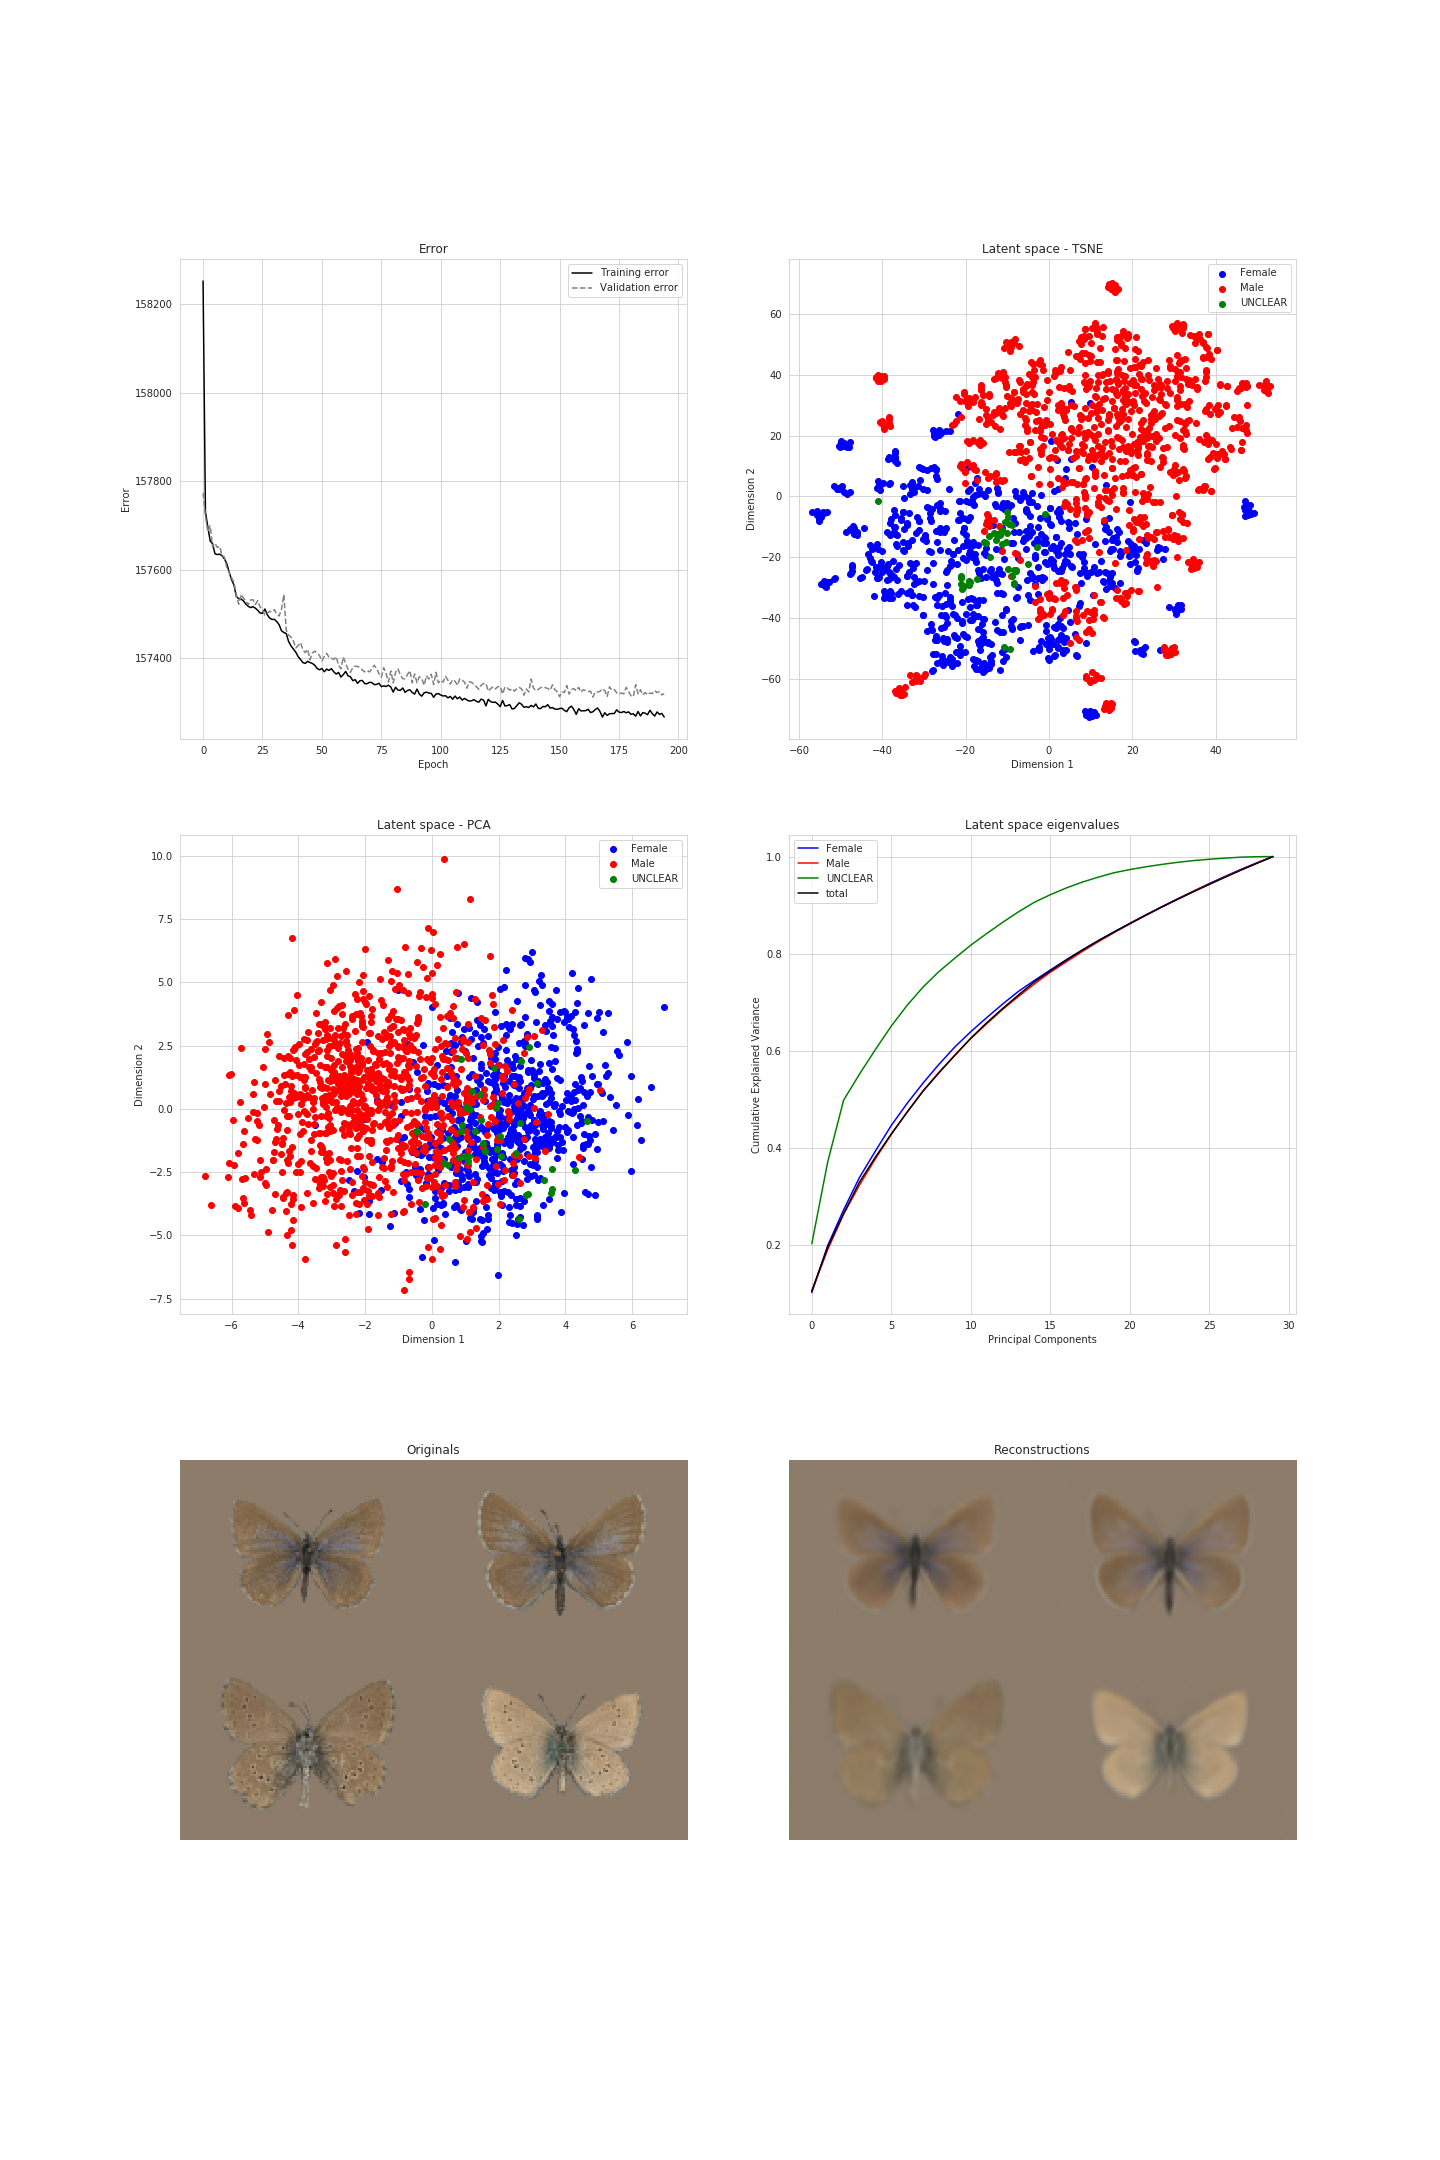

In [2]:
config = dict(modelName='VariationalAutoEncoderGMM',
              modelParams=dict(imgSize=(160,240),
                               hidden_features=500,
                               latent_features=30, 
                               in_channels=6, 
                               num_samples=10,
                               cuda=True, 
                               n_gaussians = 2, 
                               min_mu=-3, 
                               max_mu=3, 
                               sigma=1),
                 max_num_epochs = 300,
                 suffix='2g',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='melo',
                 batchSize=7,
                 earlyStopping=30,
                 cuda=True,
                 datagetter_name = 'butterfly',
                 datagetterParams = dict(
                     background = 'neutral', 
                     dataFilePath = '/home/rob/Dropbox/thesis/2. code/src/data/data.xlsx',
                     root = '/home/rob/Dropbox/thesis/2. code/datasets',
                     classifier_column = 'Sex',
                     transforms = [('resize',dict(size=(160,240))),
                                   ('hflip'),
                                   ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                                   ('totensor')],
                     sides = 'both_in_one',
                 ),
             )



ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [4]:
ex.classifier_t_accuracy

0.9201483312731767

In [2]:
config = dict(modelName='VariationalAutoEncoderGMM',
              modelParams=dict(imgSize=(160,240),
                               hidden_features=500,
                               latent_features=100, 
                               in_channels=3, 
                               num_samples=10,
                               cuda=True, 
                               n_gaussians = 10, 
                               min_mu=-3, 
                               max_mu=3, 
                               sigma=1),
                 max_num_epochs = 300,
                 suffix='_mnist_10g',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='melo',
                 batchSize=7,
                 earlyStopping=30,
                 cuda=True,
                 datagetter_name = 'mnist',
                 datagetterParams = dict(
                     background = 'black', 
                     dataFilePath = '/home/rob/Dropbox/thesis/2. code/src/data/mnist.xlsx',
                     root = '/home/rob/Dropbox/thesis/2. code/datasets/mnist',
                     transforms = [('resize',dict(size=(160,240))),
                                   ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'black'}),
                                   ('totensor')],
                     train_subset = 2008,
                     test_subset = 500,
                 ),
             )



ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

No improvement on validation set for 30 epochs. Quiting.


OSError: [Errno 12] Cannot allocate memory

In [ ]:
ex.results

In [ ]:
results = [ex.z_train, ex.y_train, ex.z_valid, ex.y_valid]
ex.net.plot(ex.results['train_losses'],ex.results['valid_losses'],ex.outputs_example,ex.outputs_example['batch'], 1, ex.outputs_example['batch'][0].size()[0], cuda=False, results=results, sides=ex.sides)

In [ ]:
a = [1,2,3,4]
np.random.shuffle(a)
a

In [ ]:
config = dict(modelName='VariationalAutoEncoderGMM',
              modelParams=dict(imgSize=(160,240),
                               hidden_features=500,
                               latent_features=30, 
                               in_channels=3, 
                               num_samples=2,
                               cuda=True, 
                               n_gaussians = 3, 
                               min_mu=-3, 
                               max_mu=3, 
                               sigma=1),
                 max_num_epochs = 300,
                 suffix='_toy_4g',
                 opt='sgd',
                 optParams = {'lr': 0.00000005},
                 loss='melo',
             batchSize=7,
             earlyStopping=30,
             sides='D', 
             transforms=[('resize', {'size': (160, 240)}), 
                         #'hflip',
                         ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'white'}),
                         #('colorjitter',{'contrast':0.1,'brightness':0.1}), 
                         'totensor',
                        #('normalize',{'mean':[0.485, 0.456, 0.406],'std':[0.229, 0.224, 0.225]}),
                        ],
              background = 'neutral',
              cuda=True,
              datasets = ['toy'],
              dataFilePath = '/home/rob/Dropbox/thesis/2. code/src/data/toy.xlsx'
              #denoise = ('masking_noise',{'p':0.2}),
             )

ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [ ]:
ex.net.train(True)
ex.loader.dataset.trainSet()
numBatches = len(ex.loader)
numImages = len(ex.loader.dataset)

try:
    for _ in range(10):
        
        losses = 0
        for batch_num, batch in enumerate(ex.loader):  
            print('batch: %s of %s'%(batch_num, numBatches))
            x, y, _id = batch
            batchSize = x.size()[0]
            if ex.cuda:
                x = x.cuda()

            ex.optimizer.zero_grad()

            if ex.denoise:
                noisy_x = ex.add_noise(x)
                outputs = ex.net(noisy_x)
                outputs['noisy_x'] = noisy_x
            else:
                outputs = ex.net(x)

            outputs['x'] = x

            loss = ex.loss_function(outputs)

            loss.backward()
            ex.optimizer.step()

            losses += loss.item()*batchSize
            #print(loss.item())
        avg_loss = losses/numImages
        #print('train loss: ',avg_loss)
except:
    aksdjhfl

In [ ]:
optimizer

In [ ]:
config = dict(modelName='VariationalAutoEncoderGMM',
              modelParams=dict(imgSize=(160,240),
                               hidden_features=500,
                               latent_features=30, 
                               in_channels=3, 
                               num_samples=4,
                               cuda=True, 
                               n_gaussians = 4, 
                               min_mu=-3, 
                               max_mu=3, 
                               sigma=1),
                 max_num_epochs = 300,
                 suffix='_toy_4g',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='melo',
             batchSize=7,
             earlyStopping=30,
             sides='D', 
             transforms=[('resize', {'size': (160, 240)}), 
                         #'hflip',
                         #('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                         #('colorjitter',{'contrast':0.1,'brightness':0.1}), 
                         'totensor',
                        #('normalize',{'mean':[0.485, 0.456, 0.406],'std':[0.229, 0.224, 0.225]}),
                        ],
              background = 'neutral',
              cuda=True,
              datasets = ['toy'],
              dataFilePath = '/home/rob/Dropbox/thesis/2. code/src/data/toy.xlsx'
              #denoise = ('masking_noise',{'p':0.2}),
             )

ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [ ]:
config = dict(modelName='VariationalAutoEncoderGMM',
              modelParams=dict(imgSize=(160,240),
                               hidden_features=500,
                               latent_features=30, 
                               in_channels=6, 
                               num_samples=15,
                               cuda=True, 
                               n_gaussians = 10, 
                               min_mu=-3, 
                               max_mu=3, 
                               sigma=1),
                 max_num_epochs = 300,
                 suffix='_10g',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='melo',
             batchSize=7,
             earlyStopping=30,
             sides='both_in_one', 
             transforms=[('resize', {'size': (160, 240)}), 
                         'hflip',
                         ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                         #('colorjitter',{'contrast':0.1,'brightness':0.1}), 
                         'totensor',
                        #('normalize',{'mean':[0.485, 0.456, 0.406],'std':[0.229, 0.224, 0.225]}),
                        ],
              background = 'neutral',
              cuda=True,
              #denoise = ('masking_noise',{'p':0.2}),
             )

ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [ ]:
config = dict(modelName='BasicAutoEncoderMoreLayers3NoMPRelu',
              modelParams=dict(imgSize=(160,240),hidden_features=500,latent_features=100, in_channels=6),
              max_num_epochs = 300,
              suffix='_noMPrelu',
              opt='adam',
              optParams = {'lr': 0.0003},
              loss='mse',
              batchSize=35,
              earlyStopping=30,
              sides='both_in_one', 
              transforms=[('resize', {'size': (160, 240)}), 
                         'hflip',
                         ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                         #('colorjitter',{'contrast':0.1,'brightness':0.1}), 
                         'totensor',
                        #('normalize',{'mean':[0.485, 0.456, 0.406],'std':[0.229, 0.224, 0.225]}),
                        ],
               background = 'neutral',
               cuda=True,
               #denoise = ('masking_noise',{'p':0.2}),
               )

ex = experiment(**config)
#ex.prep_experiment()
ex.test_experiment()
ex.run_experiment()

In [ ]:
config = dict(modelName='VariationalAutoEncoderGMM',
              modelParams=dict(imgSize=(160,240),
                               hidden_features=500,
                               latent_features=30, 
                               in_channels=6, 
                               num_samples=15,
                               cuda=True, 
                               n_gaussians = 2, 
                               min_mu=-2, 
                               max_mu=2, 
                               sigma=1),
                 max_num_epochs = 300,
                 suffix='_2g_gw',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='chello',
             batchSize=7,
             earlyStopping=30,
             sides='both_in_one', 
             transforms=[('resize', {'size': (160, 240)}), 
                         'hflip',
                         ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                         #('colorjitter',{'contrast':0.1,'brightness':0.1}), 
                         'totensor',
                        #('normalize',{'mean':[0.485, 0.456, 0.406],'std':[0.229, 0.224, 0.225]}),
                        ],
              background = 'neutral',
              cuda=True,
              #denoise = ('masking_noise',{'p':0.2}),
             )

ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [ ]:
ex = load_experiment('experiments/VariationalAutoEncoderGMM_3g.pth.tar')

In [ ]:
ex.outputs_example['w']

In [ ]:
g = ex.outputs_example['g'][1].cpu().detach()
mus = ex.outputs_example['mus'].cpu().detach()
sigmas = ex.outputs_example['sigmas'].cpu().detach()
for i in range(mus.shape[1]):
    for j in range(g.shape[1]):
        m = mus[:,i,:]
        g_j = g[0][j].transpose(0,1)
        print('mu%s - g%s'%(i,j), np.linalg.norm(m - g_j, axis=1))
        
    if i+1 < mus.shape[1]:
        m1 = mus[:,i,:]
        m2 = mus[:,i+1,:]
        print('mu%s - mu%s'%(i, i+1), np.linalg.norm(m1 - m2, axis=1))

In [ ]:
ex.max_num_epochs = 2
ex.run_experiment()

In [ ]:
ex.datasets

In [ ]:
config = dict(modelName='VariationalAutoEncoderNoUnpoolLaplace',
              modelParams=dict(imgSize=(160,240),
                               hidden_features=500,
                               latent_features=30, 
                               in_channels=6, 
                               num_samples=15,
                               cuda=True),
                 max_num_epochs = 300,
                 suffix='_test',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='elbo_laplace',
             batchSize=7,
             earlyStopping=30,
             sides='both_in_one', 
             transforms=[('resize', {'size': (160, 240)}), 
                         'hflip',
                         ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                         #('colorjitter',{'contrast':0.1,'brightness':0.1}), 
                         'totensor',
                        #('normalize',{'mean':[0.485, 0.456, 0.406],'std':[0.229, 0.224, 0.225]}),
                        ],
              background = 'neutral',
              cuda=True,
              #denoise = ('masking_noise',{'p':0.2}),
             )

ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [ ]:
ex.classifier_v_accuracy

In [ ]:
ex.classifier_v_accuracy

In [ ]:
#determine which 
batch_size = 7
n_gaussians = 3
num_samples = 15
chosen_w = ((torch.rand(batch_size,num_samples) > 0.5) + (torch.rand(batch_size,num_samples) > 0.5)).type(torch.LongTensor)
reconstruction_loss = torch.rand(batch_size,num_samples)

res_res = []
for img_no in range(batch_size):
    res = []
    res += [[] for i in range(n_gaussians)]
    ws = chosen_w[img_no]
    r_loss = reconstruction_loss[img_no]
    for i in range(num_samples):
        for j in range(i+1, num_samples):
            if ws[i] != ws[j]:
                if r_loss[i] < r_loss[j]:
                    res[ws[i]] += [1]
                    res[ws[j]] += [0]
                else:
                    res[ws[i]] += [0]
                    res[ws[j]] += [1]
    res_res += [[np.mean(a) for a in res]]
    print([np.mean(a) for a in res])
np.mean(res_res,axis=0)                    

In [ ]:
#determine which 
chosen_w = ((torch.rand(batch_size,num_samples) > 0.5) + (torch.rand(batch_size,num_samples) > 0.5)).type(torch.LongTensor)
reconstruction_loss = torch.rand(batch_size,num_samples)

with torch.no_grad():
    res = torch.zeros((batch_size, n_gaussians))

for img in range(batch_size):
    lower_counts = np.zeros(n_gaussians)
    higher_counts = np.zeros(n_gaussians)
    chosen_w_1 = chosen_w.unsqueeze(1).repeat(1,num_samples,1)[img]
    chosen_w_2 = chosen_w.unsqueeze(2).repeat(1,1,num_samples)[img]
    atkins_1 = reconstruction_loss.unsqueeze(1).repeat(1,num_samples,1)[img]
    atkins_2 = reconstruction_loss.unsqueeze(2).repeat(1,1,num_samples)[img]

    mask = (chosen_w_1 != chosen_w_2).triu()

    lower = torch.where((atkins_1 < atkins_2)[mask], chosen_w_1[mask], chosen_w_2[mask])
    higher = torch.where((atkins_1 >= atkins_2)[mask], chosen_w_1[mask], chosen_w_2[mask])
    unique, counts = np.unique(lower, return_counts=True)
    lower_counts[unique] = counts
    unique, counts = np.unique(higher, return_counts=True)
    higher_counts[unique] = counts
    res[img] = torch.tensor(lower_counts/(lower_counts + higher_counts))

x = torch.rand(batch_size, n_gaussians)
y = torch.rand(batch_size, n_gaussians)
x.requires_grad_(True)
y.requires_grad_(True)
loss = x*y - res
loss.backward()

In [ ]:
torch.softmax(res,dim=1)

In [ ]:
filepath = 'experiments/0.97_0.96_melo_15727970800_2019-06-01_VariationalAutoEncoderGMM_2g.pth.tar'
assert os.path.isfile(filepath), f"Cannot find file  {filepath}"
print(f"=> loading checkpoint '{filepath}'")
checkpoint = torch.load(filepath)
print(checkpoint['configuration'])
checkpoint['configuration']['loss'] = 'chello'
checkpoint['configuration']['loss'] = 'chello'
ex = experiment(**checkpoint['configuration'])
ex.prep_experiment()
ex.net.load_state_dict(checkpoint['state_dict'])
ex.optimizer.load_state_dict(checkpoint['optimizer_dict'])

print(f"=> loaded checkpoint '{filepath}'")

In [ ]:
ex.max_num_epochs = 3

ex.run_experiment()

In [ ]:
ex.classifier_v_accuracy

In [ ]:
ex.net = ex.net.cuda()
ex.net._cuda = True

for batch_num, batch in enumerate(ex.loader):  
    x, y, _id = batch
    batchSize = x.size()[0]
    if ex.cuda:
        x = x.cuda()

    ex.optimizer.zero_grad()

    if ex.denoise:
        noisy_x = self.add_noise(x)
        outputs = self.net(noisy_x)
        outputs['noisy_x'] = noisy_x
    else:
        outputs = ex.net(x)

    outputs['x'] = x

    loss = ex.loss_function(outputs)

    loss.backward()
    ex.optimizer.step()
    break

for layer in ex.net.decoder._modules:
    print(layer)
    try:
        exec(f"print(ex.net.encoder.{layer}._parameters['weight'].grad.mean())")
        exec(f"print(ex.net.decoder.{layer}._parameters['weight'].grad.mean())")
    except:
        pass

In [ ]:

config = dict(modelName='VariationalAutoEncoderNoUnpool',
              modelParams=dict(imgSize=(160,240),hidden_features=500,latent_features=100, in_channels=6, num_samples=15, cuda=True),
                 max_num_epochs = 3,
                 suffix='',
                 opt='adam',
                 optParams = {'lr': 0.00005},
                 loss='elbo',
             batchSize=7,
             earlyStopping=60,
             sides='both_in_one', 
             transforms=[('resize', {'size': (160, 240)}), 
                         'hflip',
                         ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                         #('colorjitter',{'contrast':0.1,'brightness':0.1}), 
                         'totensor',
                        #('normalize',{'mean':[0.485, 0.456, 0.406],'std':[0.229, 0.224, 0.225]}),
                        ],
              background = 'neutral',
              cuda=True,
              #denoise = ('masking_noise',{'p':0.2}),
             )

ex = experiment(**config)
#ex.prep_experiment()
#ex.test_experiment()
ex.run_experiment()

In [ ]:

ex.net = ex.net.cuda()
ex.net._cuda = True

for batch_num, batch in enumerate(ex.loader):  
    x, y, _id = batch
    batchSize = x.size()[0]
    if ex.cuda:
        x = x.cuda()

    ex.optimizer.zero_grad()

    if ex.denoise:
        noisy_x = self.add_noise(x)
        outputs = self.net(noisy_x)
        outputs['noisy_x'] = noisy_x
    else:
        outputs = ex.net(x)

    outputs['x'] = x

    loss = ex.loss_function(outputs)

    loss.backward()
    ex.optimizer.step()
    break

for layer in ex.net.decoder._modules:
    print(layer)
    try:
        exec(f"print(ex.net.encoder.{layer}._parameters['weight'].grad.mean())")
        exec(f"print(ex.net.decoder.{layer}._parameters['weight'].grad.mean())")
    except:
        pass

In [ ]:
mus = torch.rand((7,1,3,30))
w = torch.rand((7,3))
w = w/w.sum(dim=1, keepdim=True)
_w = torch.multinomial(w, num_samples=1).unsqueeze(1).unsqueeze(3).repeat(1,1,1,30)
torch.gather(mus, 2, _w).shape

In [ ]:
n_points = 500
d = 10
batch_size = 7
f_w = torch.rand((7,3))
f_mus = torch.randn((7,3,d)).unsqueeze(3)
f_sigmas = torch.rand((7,3,d)).unsqueeze(3)
g_w = torch.rand((1,3))
g_mus = torch.randn((1,3,d)).unsqueeze(3)
g_sigmas = torch.rand((1,3,d)).unsqueeze(3)
print(g_w.shape, g_mus.shape, g_sigmas.shape)
def make_GMM(d, n_gaussians, mu_min, mu_max, std_min, std_max, cuda):
    w = torch.rand(n_gaussians)
    w = w/torch.sum(w)
    mus = torch.rand(n_gaussians,d)*(mu_max - mu_min) + mu_min
    covs = torch.rand(n_gaussians,d)*(std_max - std_min) + std_min
    
    #if cuda:
    #    w = w.cuda()
    #    mus = mus.cuda()
    #    covs = covs.cuda()
    return w.unsqueeze(0), mus.unsqueeze(0).unsqueeze(3), covs.unsqueeze(0).unsqueeze(3)
g_w, g_mus, g_sigmas = make_GMM(d, 3, -1, 1, 0.1, 2, False)


print(g_w.shape, g_mus.shape, g_sigmas.shape)

In [ ]:
def get_pdf(x, ws, mus, sigmas):
    #get the probability density function
    #at each of the n_points points
    #for a mixed gaussian model with weights given by ws,
    #means given by mus and diagonal covariances given by sigmas
    
    #this is the exponent of the multivariate gaussian
    #The equation for a multivariate gaussian is :
    #  (2*pi)^(d/2)*det(cov)*e^((1/2)*(x-mu).T*inverse_cov*(x-mu))
    #in our case the calculation is simplified because
    #we assume the covariance matrix is diagonal, so the determinant is just the product
    #of the elements, and the inverse is just 1/sigma

    det_cov = (torch.prod(sigmas, 2)).unsqueeze(3)
    exponent = (-1/2)*((x-mus)*(1/sigmas)*(x-mus)).sum(dim=2, keepdim=True)
    multiplier =((2*np.pi)**(-d/2))*(det_cov**(-1/2))
    pdf = multiplier*np.e**exponent

    #since ours is a mixture of gaussians, we sum the pdf over the number of gaussians we have 
    #multiplied by the weight each gaussian has
    pdf = (ws.unsqueeze(2).unsqueeze(3)*pdf).sum(dim=1,keepdim=True)
    return pdf

chosen_gaussians = torch.multinomial(f_w,n_points, replacement=True).view(batch_size, 1, 1, n_points).repeat(1,1,d,1)
epsilon = torch.randn(batch_size, 1, d, n_points)

#sample n_points from the f function, these samples are x_i
x_mu = torch.gather(f_mus.repeat(1,1,1,n_points), 1, chosen_gaussians)
x_sigma = torch.gather(f_sigmas.repeat(1,1,1,n_points),1,chosen_gaussians)
x_i = x_mu + epsilon*x_sigma

f_x_i = get_pdf(x_i, f_w, f_mus, f_sigmas)
g_x_i = get_pdf(x_i, g_w, g_mus, g_sigmas)

logd = torch.log(f_x_i/g_x_i)
logd[torch.isinf(logd)] = 0
logd[torch.isnan(logd)] = 0
logd.mean()

In [ ]:
f_w.shape, f_mus.shape, f_sigmas.shape, chosen_gaussians.shape

In [ ]:

config = dict(modelName='BasicAutoEncoderNoMaxPool',
              modelParams=dict(imgSize=(160,240),hidden_features=500,latent_features=30, in_channels=6),
                 max_num_epochs = 300,
                 suffix='_6chan',
                 opt='adam',
                 optParams = {'lr': 0.0003},
                 loss='mse',
             batchSize=35,
             earlyStopping=30,
             sides='both_in_one', 
             transforms=[('resize', {'size': (160, 240)}), 
                         'hflip',
                         ('rotateandscale',{'rotation':1, 'scaling':0.1, 'background':'neutral'}),
                         #('colorjitter',{'contrast':0.1,'brightness':0.1}), 
                         'totensor',
                        #('normalize',{'mean':[0.485, 0.456, 0.406],'std':[0.229, 0.224, 0.225]}),
                        ],
              background = 'neutral',
              #denoise = ('masking_noise',{'p':0.2}),
             )

ex = experiment(**config)
#ex.prep_experiment()
ex.test_experiment()
ex.run_experiment()

In [ ]:
ex.configuration

In [ ]:

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
ex.z_train.shape
train_ids = list(map(int,ex.train_ids))
valid_ids = list(map(int,ex.valid_ids))
df = ex.df
df = df.set_index('ID (number)')
# Latent space PCA
f, axarr = plt.subplots(2, 2, figsize=(20, 10))

column = 'Year'
df['Year'] = df['Year'].map(lambda x: np.nan if (x == 'UNKNOWN')|(x=='NO SPECIMEN') else float(x))
ax = axarr[0,0]

ax.set_title('Year')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
z_plot = ex.z_valid

pca = PCA(n_components=2)
z_pca = pca.fit_transform(z_plot)

year_min = df['Year'].min()
year_range = df['Year'].max() - df['Year'].min()
for name,group in df.groupby('Year'):
    indexes = df.loc[valid_ids,'Year'] == name
    ax.scatter(*z_pca[indexes].T, c='blue', marker='o', label=str(name), alpha=(name-year_min)/year_range )

ax.legend()

# Latent space TSNE
ax = axarr[1, 0]

ax.set_title('Latent space - TSNE')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

tsne = TSNE(n_components=2, perplexity=20)
z_tsne = tsne.fit_transform(z_plot)

for name,group in df.groupby('Year'):
    indexes = df.loc[valid_ids,'Year'] == name
    ax.scatter(*z_tsne[indexes].T, c='blue', marker='o', label=str(name), alpha=(name-year_min)/year_range )


#region
df['Region'] = df['Region'].map(lambda x: np.nan if (x == 'UNKNOWN')|(x=='NO SPECIMEN') else x)
ax = axarr[0,1]

ax.set_title('Region')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
z_plot = ex.z_valid

pca = PCA(n_components=2)
z_pca = pca.fit_transform(z_plot)

colors = ['blue','red','green','yellow','purple','pink','purple','orange','cyan']
i = 1
for name,group in df.groupby('Region'):
    indexes = df.loc[valid_ids,'Region'] == name
    if indexes.sum() < 10:
        color = 'black'
    else:
        color = colors[i%(len(colors)-1)]
    ax.scatter(*z_pca[indexes].T, c=color, marker='o', label=str(name), alpha=0.5 )
    i+=1

ax.legend()


# Latent space TSNE
ax = axarr[1, 1]

ax.set_title('Latent space - TSNE')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

tsne = TSNE(n_components=2, perplexity=20)
z_tsne = tsne.fit_transform(z_plot)

colors = ['blue','red','green','yellow','purple','pink','purple','orange','cyan']
i = 1
for name,group in df.groupby('Region'):
    indexes = df.loc[valid_ids,'Region'] == name
    if indexes.sum() < 10:
        color = 'black'
    else:
        color = colors[i%(len(colors)-1)]
    ax.scatter(*z_tsne[indexes].T, c=color, marker='o', label=str(name), alpha=0.5 )
    i+=1

ax.legend()

In [ ]:
x = ex.outputs_example['x'].unsqueeze(1)
x_hat_all = ex.outputs_example['x_hat_all']
ret = (x_hat_all - x) ** 2
,ex.outputs_example['epsilon'].shape

In [ ]:
plt.plot(ex.outputs_example['epsilon'][[0,1,2,3,4],torch.argmin(torch.mean(ret,dim=(2,3,4)), dim=1)].cpu().detach().numpy().T,alpha=0.5)
plt.plot(ex.outputs_example['epsilon'][[0,1,2,3,4],torch.argmin(torch.mean(ret,dim=(2,3,4)), dim=1)].cpu().detach().numpy().T.mean(axis=1),color='red')

In [ ]:
f, axarr = plt.subplots(17, 2, figsize=(10, 50))
b = ex.outputs_example['x'][0]
ax = axarr[0, 0]
ax.set_title('original')
ax.grid(b=None)
ax.axis('off')
ax.imshow(b.cpu().detach().numpy().transpose(1,2,0)[:,:,:3])
ax = axarr[0, 1]
ax.set_title('original')
ax.grid(b=None)
ax.axis('off')
ax.imshow(b.cpu().detach().numpy().transpose(1,2,0)[:,:,3:])

for i in range(1,16):
    a = ex.outputs_example['x_hat_all'][0,i-1]

    # Loss
    ax = axarr[i, 0]
    ax.set_title('reconstruction %s'%i)
    ax.grid(b=None)
    ax.axis('off')
    ax.imshow(a.cpu().detach().numpy().transpose(1,2,0)[:,:,:3])
    ax = axarr[i, 1]
    ax.set_title('reconstruction %s'%i)
    ax.grid(b=None)
    ax.axis('off')
    ax.imshow(a.cpu().detach().numpy().transpose(1,2,0)[:,:,3:])
b = ex.outputs_example['x_hat'][0]
ax = axarr[16, 0]
ax.set_title('final avg')
ax.grid(b=None)
ax.axis('off')
ax.imshow(b.cpu().detach().numpy().transpose(1,2,0)[:,:,:3])
ax = axarr[16, 1]
ax.set_title('final avg')
ax.grid(b=None)
ax.axis('off')
ax.imshow(b.cpu().detach().numpy().transpose(1,2,0)[:,:,3:])
plt.savefig('VAE example output.png')